# The Battle Of Neighborhood

### Importing Libraries

In [1]:
!pip install geocoder
!pip install folium

     |████████████████████████████████| 98 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 93 kB 3.4 MB/s eta 0:00:011


In [2]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


### Data Extraction and Cleaning

In [3]:
url = "https://cocl.us/new_york_dataset"
resp=requests.get(url).json()
    # all data is present in features label
features=resp['features']


In [4]:
column_names = ['Borough', 'Neighborhood', 'Latitude','Longitude']
new_york_data = pd.DataFrame(columns=column_names)

In [5]:
for data in features:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [6]:
new_york_data.head(10)

Borough    Neighborhood   Latitude  Longitude
0      Bronx       Wakefield  40.894705 -73.847201
1      Bronx      Co-op City  40.874294 -73.829939
2      Bronx     Eastchester  40.887556 -73.827806
3      Bronx       Fieldston  40.895437 -73.905643
4      Bronx       Riverdale  40.890834 -73.912585
5      Bronx     Kingsbridge  40.881687 -73.902818
6  Manhattan     Marble Hill  40.876551 -73.910660
7      Bronx        Woodlawn  40.898273 -73.867315
8      Bronx         Norwood  40.877224 -73.879391
9      Bronx  Williamsbridge  40.881039 -73.857446

In [7]:
new_york_data.shape

(306, 4)

#### So the dataset has 5 Boroughs and 306 Neighborhoods

### Map Of New York

In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [9]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(new_york_data['Latitude'], new_york_data['Longitude'], new_york_data['Borough'], new_york_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Creating a graph to show different Neighborhoods in New York

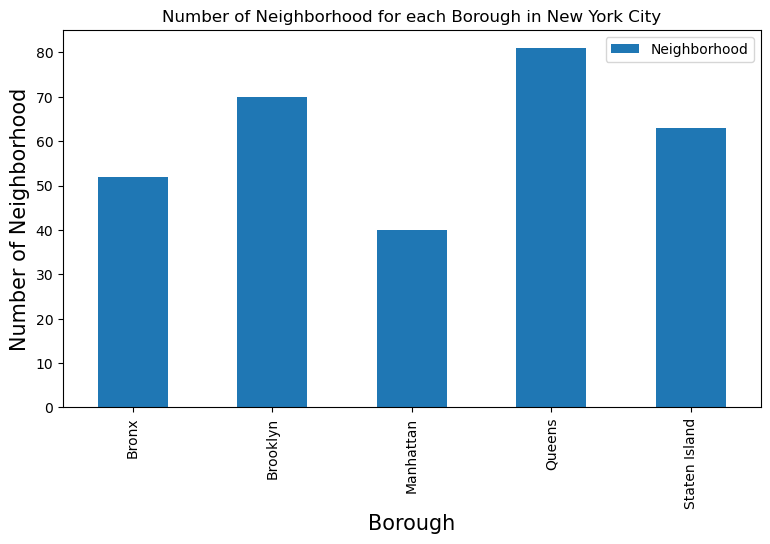

In [10]:
plt.figure(figsize=(9,5),dpi = 100)
plt.title('Number of Neighborhood for each Borough in New York City')
#x-axis
plt.xlabel('Borough', fontsize = 15)
#y-axis
plt.ylabel('Number of Neighborhood', fontsize = 15)
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
plt.legend()
plt.show()

### Here we can see Queens has highest number of neighborhoods and Manhattan has the least number of neighborhoods

People wish to settle in places according to their personal likings and their requirements. Every one have their own needs. Some of them wish to settle near a school or hospital while some of them wish to settle near a restaurant and so on. So here we are going to give a detailed information about each borough and their availabilities. So one can select suitable neighborhood according to their needs.

In [11]:
manhattan_data = new_york_data[new_york_data['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

In [12]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [13]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

<Figure size 900x500 with 0 Axes>

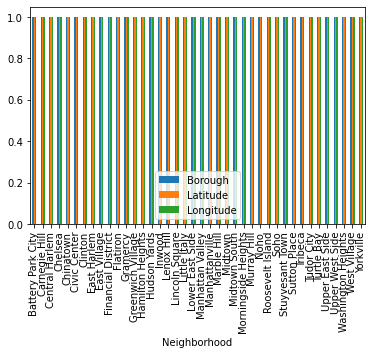

In [14]:
plt.figure(figsize=(9,5),dpi = 100)

manhattan_data.groupby('Neighborhood').count().plot(kind='bar')



In [15]:
CLIENT_ID = 'NXPZV2ACYNRRU4KSQB1SSIA1HRFGX3ZMVF3AW03PISP2VYON' # your Foursquare ID
CLIENT_SECRET = 'KNO3YGVFCDJJ5QXFGFAW0IAEXNA1L2GSOGWZ2QHG02UYPVCO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NXPZV2ACYNRRU4KSQB1SSIA1HRFGX3ZMVF3AW03PISP2VYON
CLIENT_SECRET:KNO3YGVFCDJJ5QXFGFAW0IAEXNA1L2GSOGWZ2QHG02UYPVCO


In [16]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [17]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [18]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NXPZV2ACYNRRU4KSQB1SSIA1HRFGX3ZMVF3AW03PISP2VYON&client_secret=KNO3YGVFCDJJ5QXFGFAW0IAEXNA1L2GSOGWZ2QHG02UYPVCO&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc07f486985792a44ccf90a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name   categories        lat        lng
0       Arturo's  Pizza Place  40.874412 -73.910271
1    Bikram Yoga  Yoga Studio  40.876844 -73.906204
2  Tibbett Diner        Diner  40.880404 -73.908937
3        Dunkin'   Donut Shop  40.877136 -73.906666
4      Starbucks  Coffee Shop  40.877531 -73.905582

In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

23 venues were returned by Foursquare.


### Explore the Neighborhoods In Manhattan

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [26]:
manhattan_venues.shape

(3219, 7)

In [27]:
manhattan_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Battery Park City                       66                      66     66   
Carnegie Hill                           86                      86     86   
Central Harlem                          46                      46     46   
Chelsea                                100                     100    100   
Chinatown                              100                     100    100   
Civic Center                           100                     100    100   
Clinton                                100                     100    100   
East Harlem                             40                      40     40   
East Village                           100                     100    100   
Financial District                     100                     100    100   
Flatiron                               100                     100    100   
Gramercy                                94                      94     94   
Greenwich Village                      100                     100    100   
Hamilton Heights                        63                      63     63   
Hudson Yards                            63                      63     63   
Inwood                                  58                      58     58   
Lenox Hill                             100                     100    100   
Lincoln Square                          94                      94     94   
Little Italy                           100                     100    100   
Lower East Side                         48                      48     48   
Manhattan Valley                        50                      50     50   
Manhattanville                          49                      49     49   
Marble Hill                             23                      23     23   
Midtown                                100                     100    100   
Midtown South                          100                     100    100   
Morningside Heights                     45                      45     45   
Murray Hill                            100                     100    100   
Noho                                   100                     100    100   
Roosevelt Island                        27                      27     27   
Soho                                   100                     100    100   
Stuyvesant Town                         17                      17     17   
Sutton Place                           100                     100    100   
Tribeca                                 88                      88     88   
Tudor City                              81                      81     81   
Turtle Bay                             100                     100    100   
Upper East Side                         98                      98     98   
Upper West Side                         98                      98     98   
Washington Heights                      85                      85     85   
West Village                           100                     100    100   
Yorkville                              100                     100    100   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
Battery Park City                66               66              66  
Carnegie Hill                    86               86              86  
Central Harlem                   46               46              46  
Chelsea                         100              100             100  
Chinatown                       100              100             100  
Civic Center                    100              100             100  
Clinton                         100              100             100  
East Harlem                      40               40              40  
East Village                    100              100             100  
Finan

In [28]:


manhattan_venues['Venue Category'].unique()[:100]



array(['Pizza Place', 'Yoga Studio', 'Diner', 'Donut Shop', 'Coffee Shop',
       'Gym', 'Pharmacy', 'Department Store', 'Seafood Restaurant',
       'Tennis Stadium', 'Discount Store', 'Supplement Shop',
       'Ice Cream Shop', 'Sandwich Place', 'Video Game Store',
       'Steakhouse', 'Kids Store', 'Deli / Bodega', 'Spa', 'Hotel',
       'Chinese Restaurant', 'Cocktail Bar', 'Greek Restaurant', 'Bakery',
       'Noodle House', 'Bubble Tea Shop', 'Hotpot Restaurant',
       'Bike Shop', 'Dessert Shop', 'Museum', 'New American Restaurant',
       'American Restaurant', 'Roof Deck', 'Indie Movie Theater',
       'Salon / Barbershop', 'Asian Restaurant', 'Spanish Restaurant',
       'Garden Center', 'Tea Room', 'Furniture / Home Store',
       'Historic Site', 'Thai Restaurant', 'Boutique',
       'Shanghai Restaurant', 'Music Venue', 'Organic Grocery',
       'Supermarket', 'Cosmetics Shop', 'Malay Restaurant',
       'Vietnamese Restaurant', 'Mexican Restaurant', 'Snack Place',
      

In [29]:


"Supermarket" in manhattan_venues['Venue Category'].unique()



True

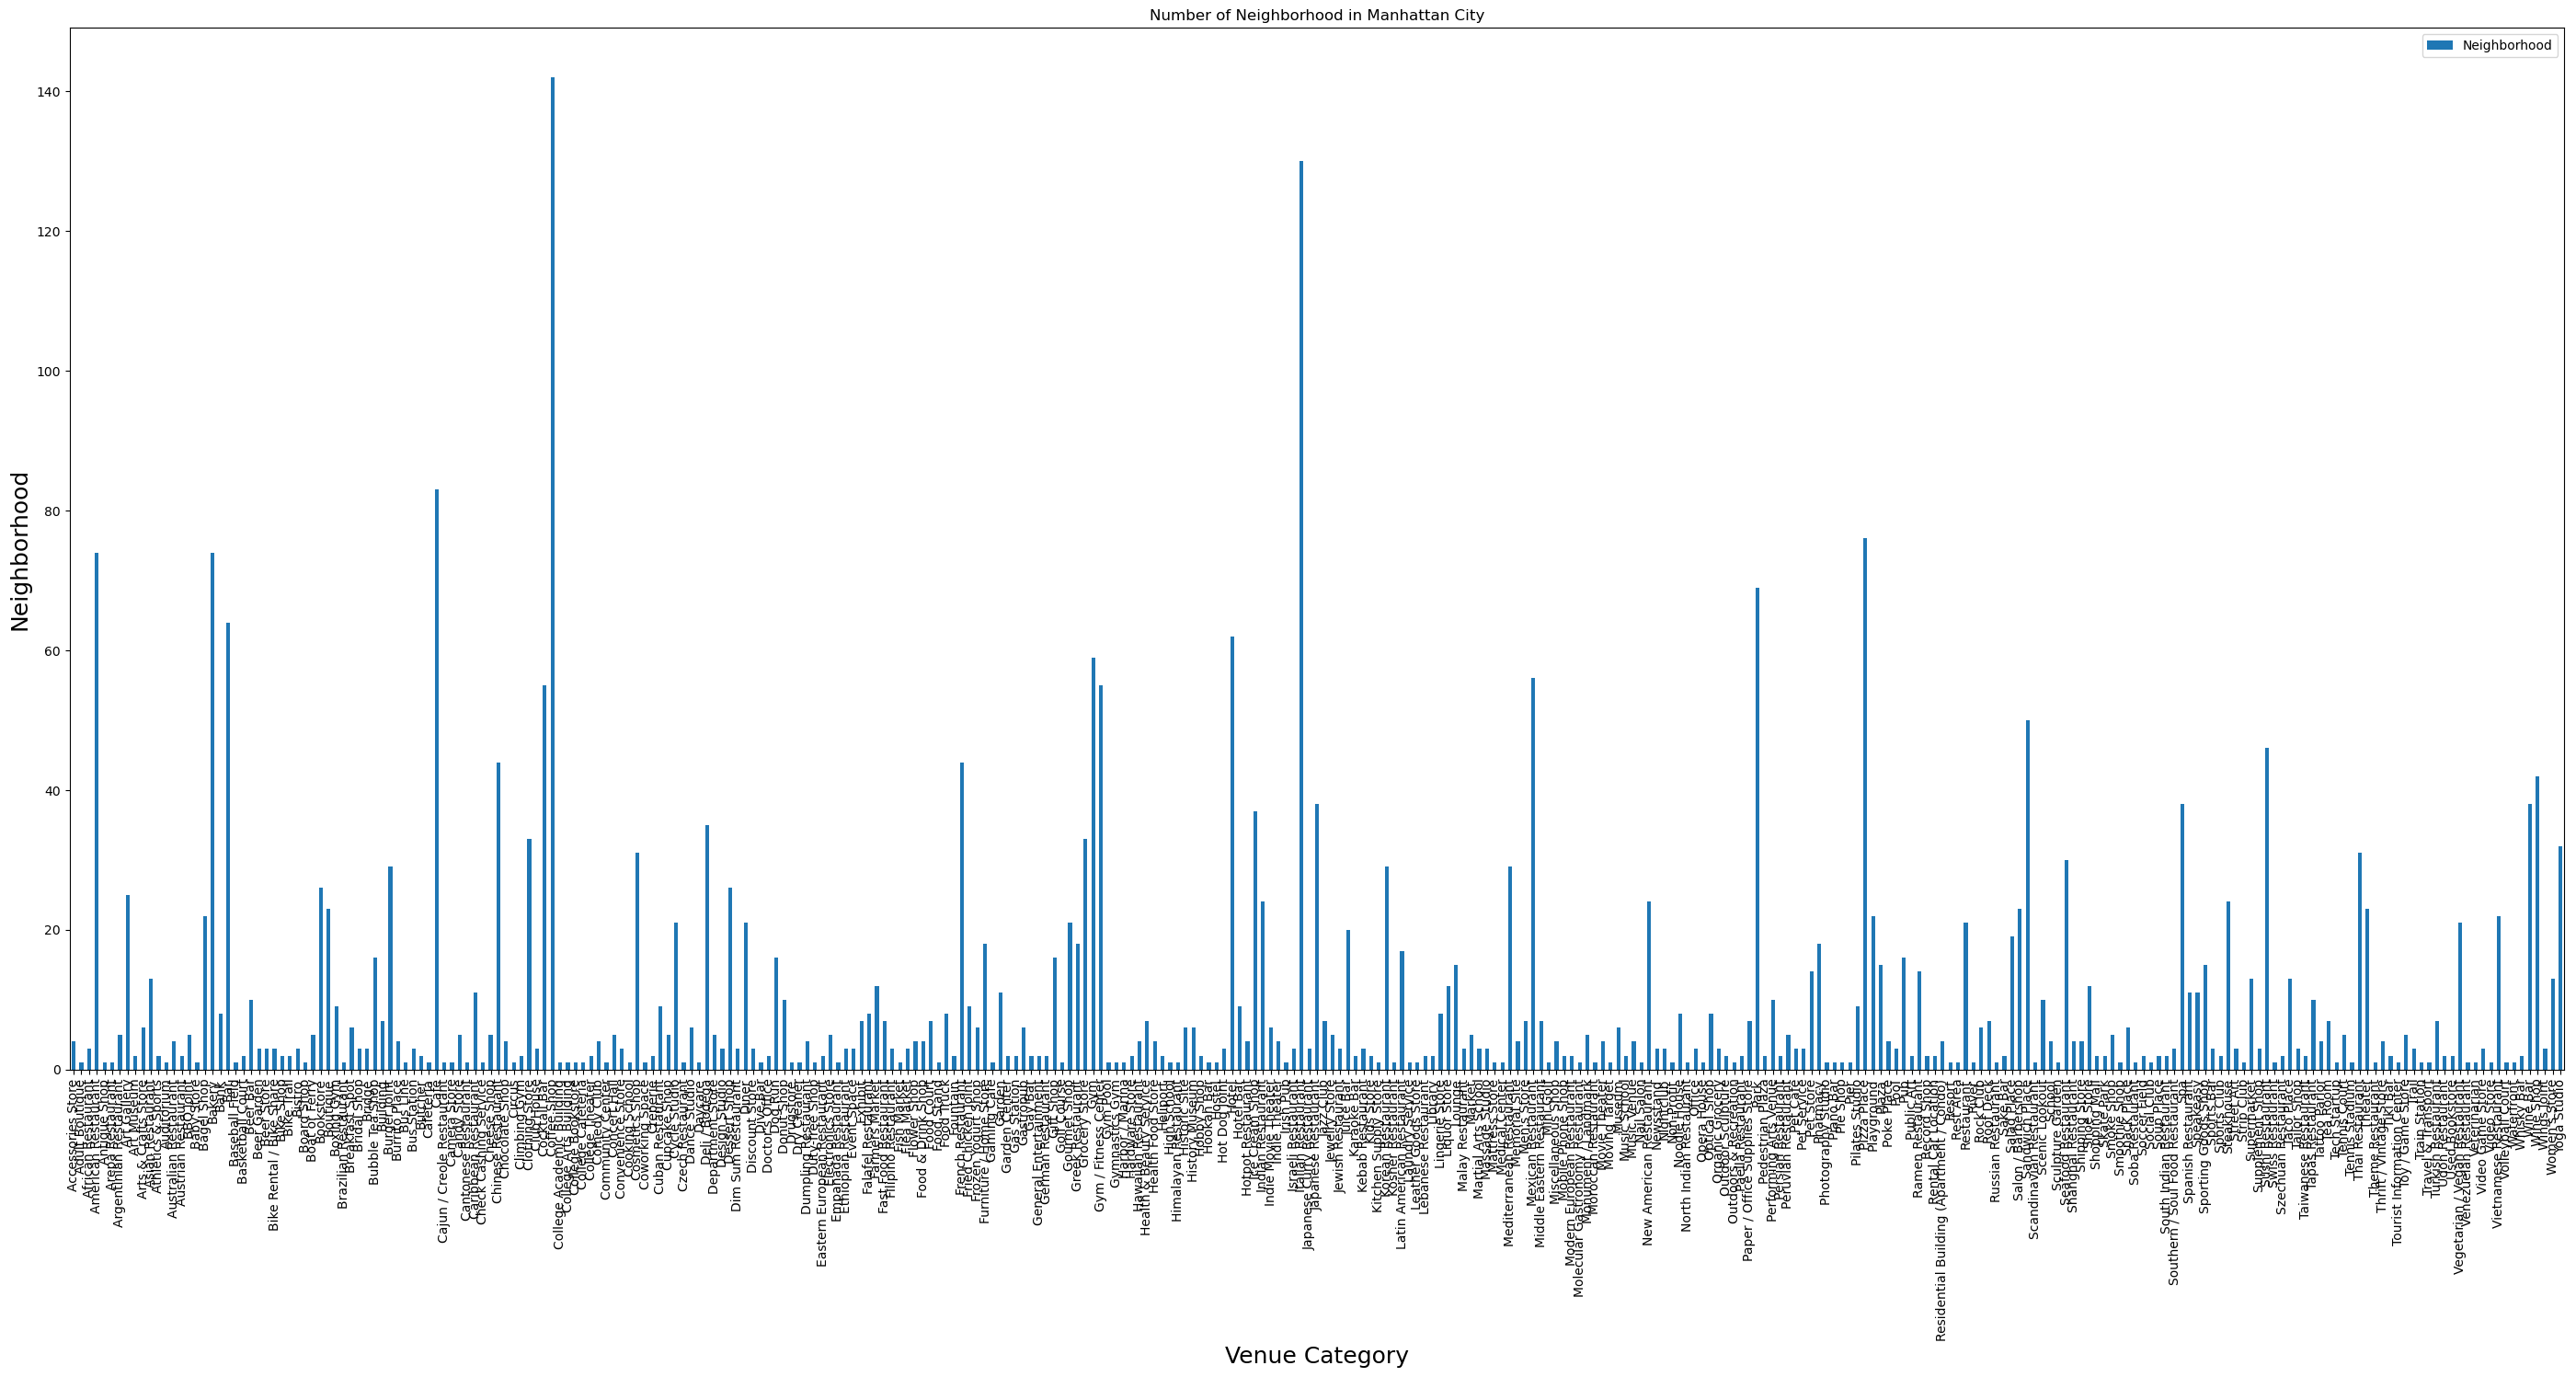

In [31]:
plt.figure(figsize=(35,15), dpi = 100)
plt.title('Number of Neighborhood in Manhattan City')
#x-axis
plt.xlabel('Venue Category', fontsize = 18)
#y-axis
plt.ylabel('Neighborhood', fontsize = 18)
manhattan_venues.groupby('Venue Category')['Neighborhood'].count().plot(kind='bar').alpha=0.75
plt.legend()
plt.show()

### Brooklyn

In [32]:
brooklyn_data = new_york_data[new_york_data['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

Borough Neighborhood   Latitude  Longitude
0  Brooklyn    Bay Ridge  40.625801 -74.030621
1  Brooklyn  Bensonhurst  40.611009 -73.995180
2  Brooklyn  Sunset Park  40.645103 -74.010316
3  Brooklyn   Greenpoint  40.730201 -73.954241
4  Brooklyn    Gravesend  40.595260 -73.973471

In [33]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [34]:
# create map of Brooklyn using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

<Figure size 8900x4500 with 0 Axes>

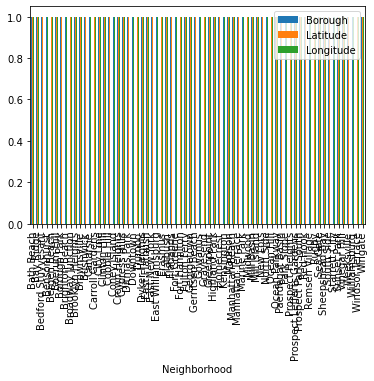

In [35]:
plt.figure(figsize=(89,45),dpi = 100)
brooklyn_data.groupby('Neighborhood').count().plot(kind='bar').alpha=0.75


In [36]:
brooklyn_data.loc[0, 'Neighborhood']

'Bay Ridge'

In [37]:
neighborhood_latitude = brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


In [38]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NXPZV2ACYNRRU4KSQB1SSIA1HRFGX3ZMVF3AW03PISP2VYON&client_secret=KNO3YGVFCDJJ5QXFGFAW0IAEXNA1L2GSOGWZ2QHG02UYPVCO&v=20180605&ll=40.625801065010656,-74.03062069353813&radius=500&limit=100'

In [39]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc08035e923bf4081859898'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Ridge',
  'headerFullLocation': 'Bay Ridge, Brooklyn',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 83,
  'suggestedBounds': {'ne': {'lat': 40.63030106951066,
    'lng': -74.02470273356597},
   'sw': {'lat': 40.62130106051065, 'lng': -74.03653865351028}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b895827f964a5206c2d32e3',
       'name': 'Pilo Arts Day Spa and Salon',
       'location': {'address': '8412 3rd Ave',
        'lat': 40.62474788273414,
        'lng': -74.03059056940135,
        'labeledLatL

In [40]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [41]:
brooklyn_venues.shape

(2868, 7)

In [42]:
brooklyn_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Bath Beach                                    46                      46   
Bay Ridge                                     83                      83   
Bedford Stuyvesant                            30                      30   
Bensonhurst                                   36                      36   
Bergen Beach                                   8                       8   
Boerum Hill                                   92                      92   
Borough Park                                  22                      22   
Brighton Beach                                43                      43   
Broadway Junction                             25                      25   
Brooklyn Heights                             100                     100   
Brownsville                                   20                      20   
Bushwick                                      72                      72   
Canarsie                                       8                       8   
Carroll Gardens                              100                     100   
City Line                                     38                      38   
Clinton Hill                                  94                      94   
Cobble Hill                                   89                      89   
Coney Island                                  19                      19   
Crown Heights                                 26                      26   
Cypress Hills                                 27                      27   
Ditmas Park                                   58                      58   
Downtown                                     100                     100   
Dumbo                                         66                      66   
Dyker Heights                                  7                       7   
East Flatbush                                 18                      18   
East New York                                 15                      15   
East Williamsburg                             67                      67   
Erasmus                                       29                      29   
Flatbush                                      22                      22   
Flatlands                                     20                      20   
Fort Greene                                   65                      65   
Fort Hamilton                                 74                      74   
Fulton Ferry                                  61                      61   
Georgetown                                    28                      28   
Gerritsen Beach                               21                      21   
Gowanus                                       68                      68   
Gravesend                                     32                      32   
Greenpoint                                   100                     100   
Highland Park                                 18                      18   
Homecrest                                     37                      37   
Kensington                                    37                      37   
Madison                                       12                      12   
Manhattan Beach                               12                      12   
Manhattan Terrace                             27                      27   
Marine Park                                    9                       9   
Midwood                                       14                      14   
Mill Basin                                    35                      35   
Mill Island                                    1                       1   
New Lots                                      27                      27   
North Side                                   100                     100   
Ocean Hill                                    34                      34   

In [43]:
brooklyn_venues['Venue Category'].unique()[:100]

array(['Spa', 'Bagel Shop', 'Caucasian Restaurant', 'Pizza Place',
       'Breakfast Spot', 'Juice Bar', 'Taco Place', 'Greek Restaurant',
       'Grocery Store', 'Bookstore', 'Middle Eastern Restaurant',
       'Sports Bar', 'Hookah Bar', 'Bar', 'Lounge', 'Optical Shop',
       'Italian Restaurant', 'Tea Room', 'Café', 'American Restaurant',
       'Ice Cream Shop', 'Chinese Restaurant', 'New American Restaurant',
       'Video Game Store', 'Sushi Restaurant', 'Toy / Game Store',
       'Indian Restaurant', 'Department Store', 'Seafood Restaurant',
       'Thai Restaurant', 'Lingerie Store', 'Clothing Store',
       'Sandwich Place', 'Vietnamese Restaurant', 'Dim Sum Restaurant',
       'Pool Hall', 'Mexican Restaurant', 'Pharmacy', 'Snack Place',
       'Kids Store', 'Fast Food Restaurant', 'Gym / Fitness Center',
       'Mattress Store', 'Supermarket', 'Hotel', 'Yoga Studio',
       'Boutique', 'Cosmetics Shop', 'Mediterranean Restaurant',
       'Electronics Store', 'Playground', '

In [44]:
"Bank" in brooklyn_venues['Venue Category'].unique()

True

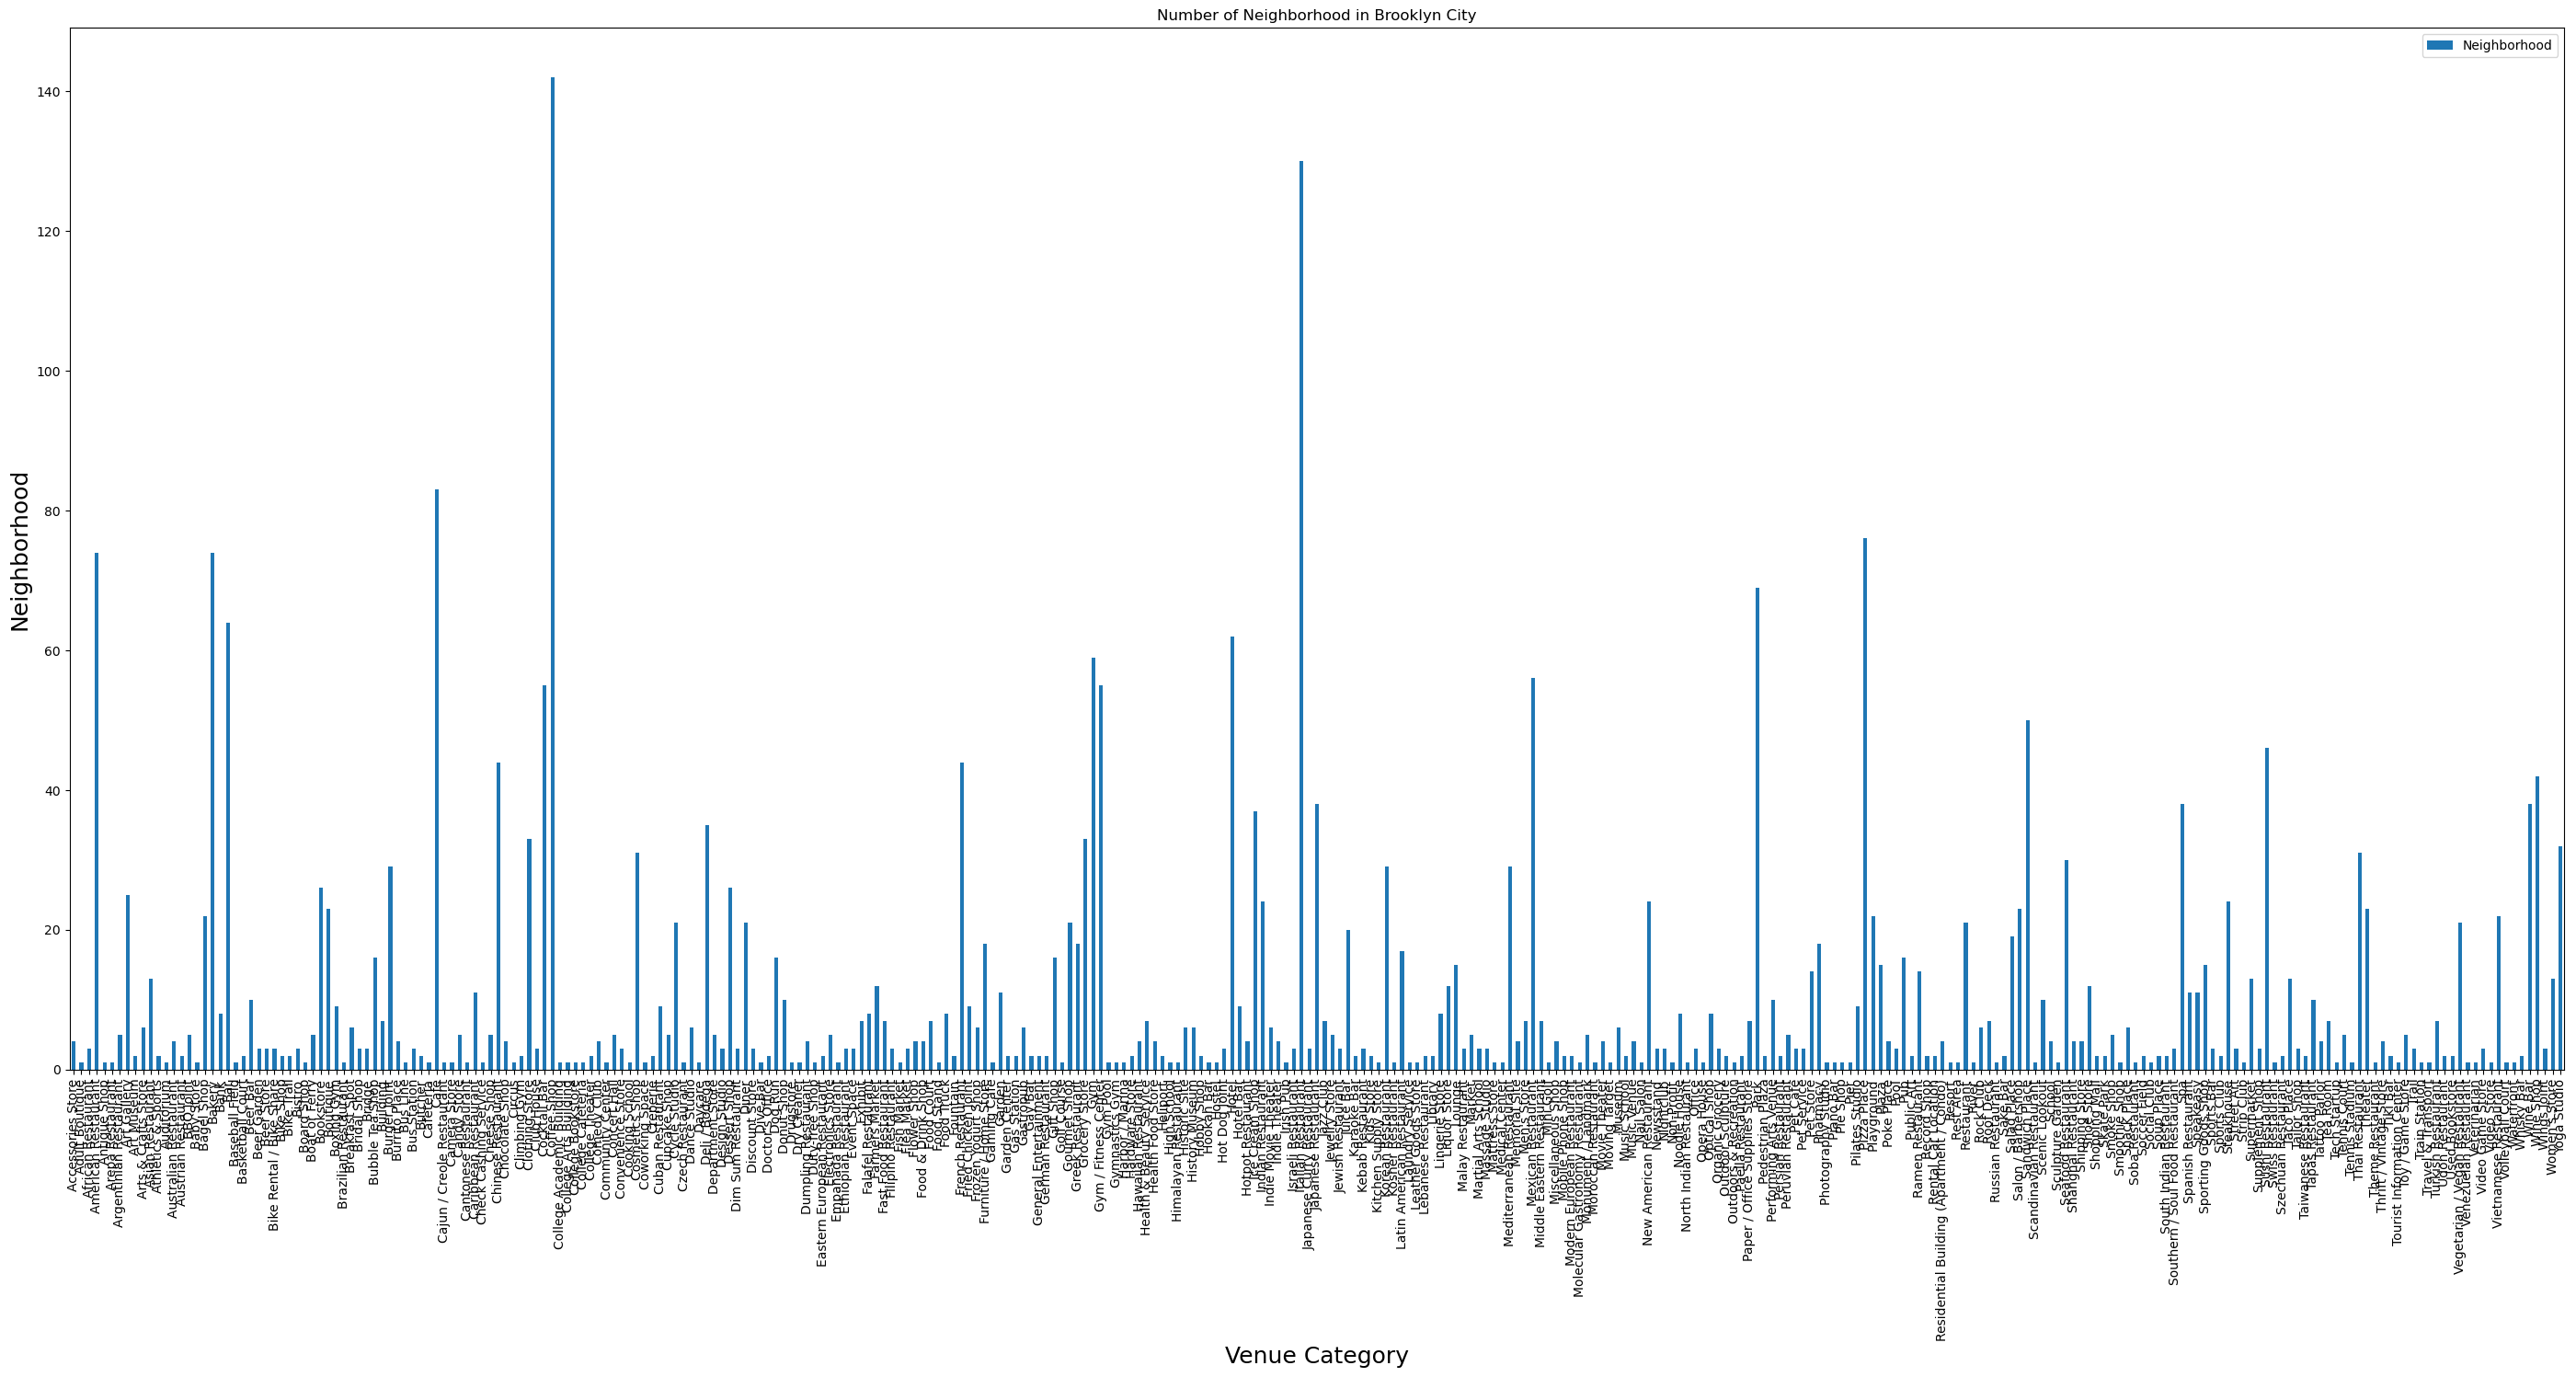

In [45]:
plt.figure(figsize=(35,15), dpi = 100)
plt.title('Number of Neighborhood in Brooklyn City')
#x-axis
plt.xlabel('Venue Category', fontsize = 18)
#y-axis
plt.ylabel('Neighborhood', fontsize = 18)
manhattan_venues.groupby('Venue Category')['Neighborhood'].count().plot(kind='bar').alpha=0.75
plt.legend()
plt.show()

### Bronx

In [46]:
bronx_data = new_york_data[new_york_data['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [47]:
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.8466508, -73.8785937.


In [48]:
# create map of Bronx using latitude and longitude values
map_bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

<Figure size 8900x4500 with 0 Axes>

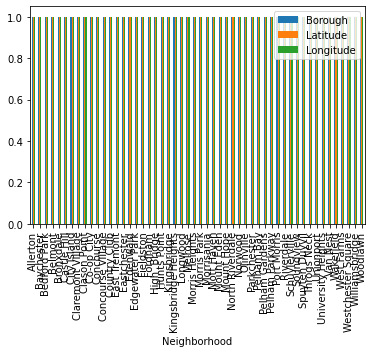

In [49]:
plt.figure(figsize=(89,45),dpi = 100)
bronx_data.groupby('Neighborhood').count().plot(kind='bar').alpha=0.75


In [50]:
bronx_data.loc[0, 'Neighborhood']

'Wakefield'

In [51]:
neighborhood_latitude = bronx_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bronx_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = bronx_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [52]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NXPZV2ACYNRRU4KSQB1SSIA1HRFGX3ZMVF3AW03PISP2VYON&client_secret=KNO3YGVFCDJJ5QXFGFAW0IAEXNA1L2GSOGWZ2QHG02UYPVCO&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [53]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc080a340b3025d635bfcb5'},
 'response': {'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 10,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.894123150205274,
          'lng': -73.84589162362325},
   

In [54]:
bronx_venues = getNearbyVenues(names=bronx_data['Neighborhood'],
                                   latitudes=bronx_data['Latitude'],
                                   longitudes=bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [55]:
bronx_venues.shape

(1304, 7)

In [56]:
bronx_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Allerton                                34                      34     34   
Baychester                              21                      21     21   
Bedford Park                            38                      38     38   
Belmont                                 98                      98     98   
Bronxdale                               14                      14     14   
Castle Hill                              8                       8      8   
City Island                             33                      33     33   
Claremont Village                       22                      22     22   
Clason Point                            15                      15     15   
Co-op City                              17                      17     17   
Concourse                               33                      33     33   
Concourse Village                       41                      41     41   
Country Club                             6                       6      6   
East Tremont                            18                      18     18   
Eastchester                             25                      25     25   
Edenwald                                 5                       5      5   
Edgewater Park                          22                      22     22   
Fieldston                                3                       3      3   
Fordham                                 89                      89     89   
High  Bridge                            31                      31     31   
Hunts Point                             13                      13     13   
Kingsbridge                             73                      73     73   
Kingsbridge Heights                     36                      36     36   
Longwood                                 7                       7      7   
Melrose                                 27                      27     27   
Morris Heights                           9                       9      9   
Morris Park                             21                      21     21   
Morrisania                              27                      27     27   
Mott Haven                              23                      23     23   
Mount Eden                              29                      29     29   
Mount Hope                              15                      15     15   
North Riverdale                         22                      22     22   
Norwood                                 34                      34     34   
Olinville                               13                      13     13   
Parkchester                             36                      36     36   
Pelham Bay                              42                      42     42   
Pelham Gardens                          20                      20     20   
Pelham Parkway                          25                      25     25   
Port Morris                             13                      13     13   
Riverdale                               13                      13     13   
Schuylerville                           18                      18     18   
Soundview                               17                      17     17   
Spuyten Duyvil                          12                      12     12   
Throgs Neck                             11                      11     11   
Unionport                               21                      21     21   
University Heights                      24                      24     24   
Van Nest                                24                      24     24   
Wakefield                               10                      10     10   
West Farms                              28                      28     28   
Westchester Square                      32                      32     32   
Williamsbridge   

In [57]:
bronx_venues['Venue Category'].unique()[:100]

array(['Dessert Shop', 'Pharmacy', 'Donut Shop', 'Ice Cream Shop',
       'Gas Station', 'Sandwich Place', 'Caribbean Restaurant',
       'Deli / Bodega', 'Laundromat', 'Discount Store', 'Pizza Place',
       'Post Office', 'Bagel Shop', 'Fast Food Restaurant',
       'Grocery Store', 'Restaurant', 'Bus Station', 'Baseball Field',
       'Chinese Restaurant', 'Trail', 'Park', 'Bar', 'Plaza',
       'Accessories Store', 'Diner', 'Seafood Restaurant',
       'Bowling Alley', 'Automotive Shop', 'Food & Drink Shop',
       'Metro Station', 'Convenience Store', 'Juice Bar', 'Bus Stop',
       'Cosmetics Shop', 'River', 'Medical Supply Store', 'Bank',
       'Playground', 'Moving Target', 'Farmers Market', 'Food Truck',
       'Home Service', 'Gym', 'Gourmet Shop', 'Latin American Restaurant',
       'Burger Joint', 'Pub', 'Beer Bar', 'Warehouse Store',
       'Mexican Restaurant', 'Coffee Shop', 'Spanish Restaurant',
       'Wings Joint', 'Thrift / Vintage Store', 'Supermarket', 'Bakery',
 

In [58]:
"Restaurant" in bronx_venues['Venue Category'].unique()

True

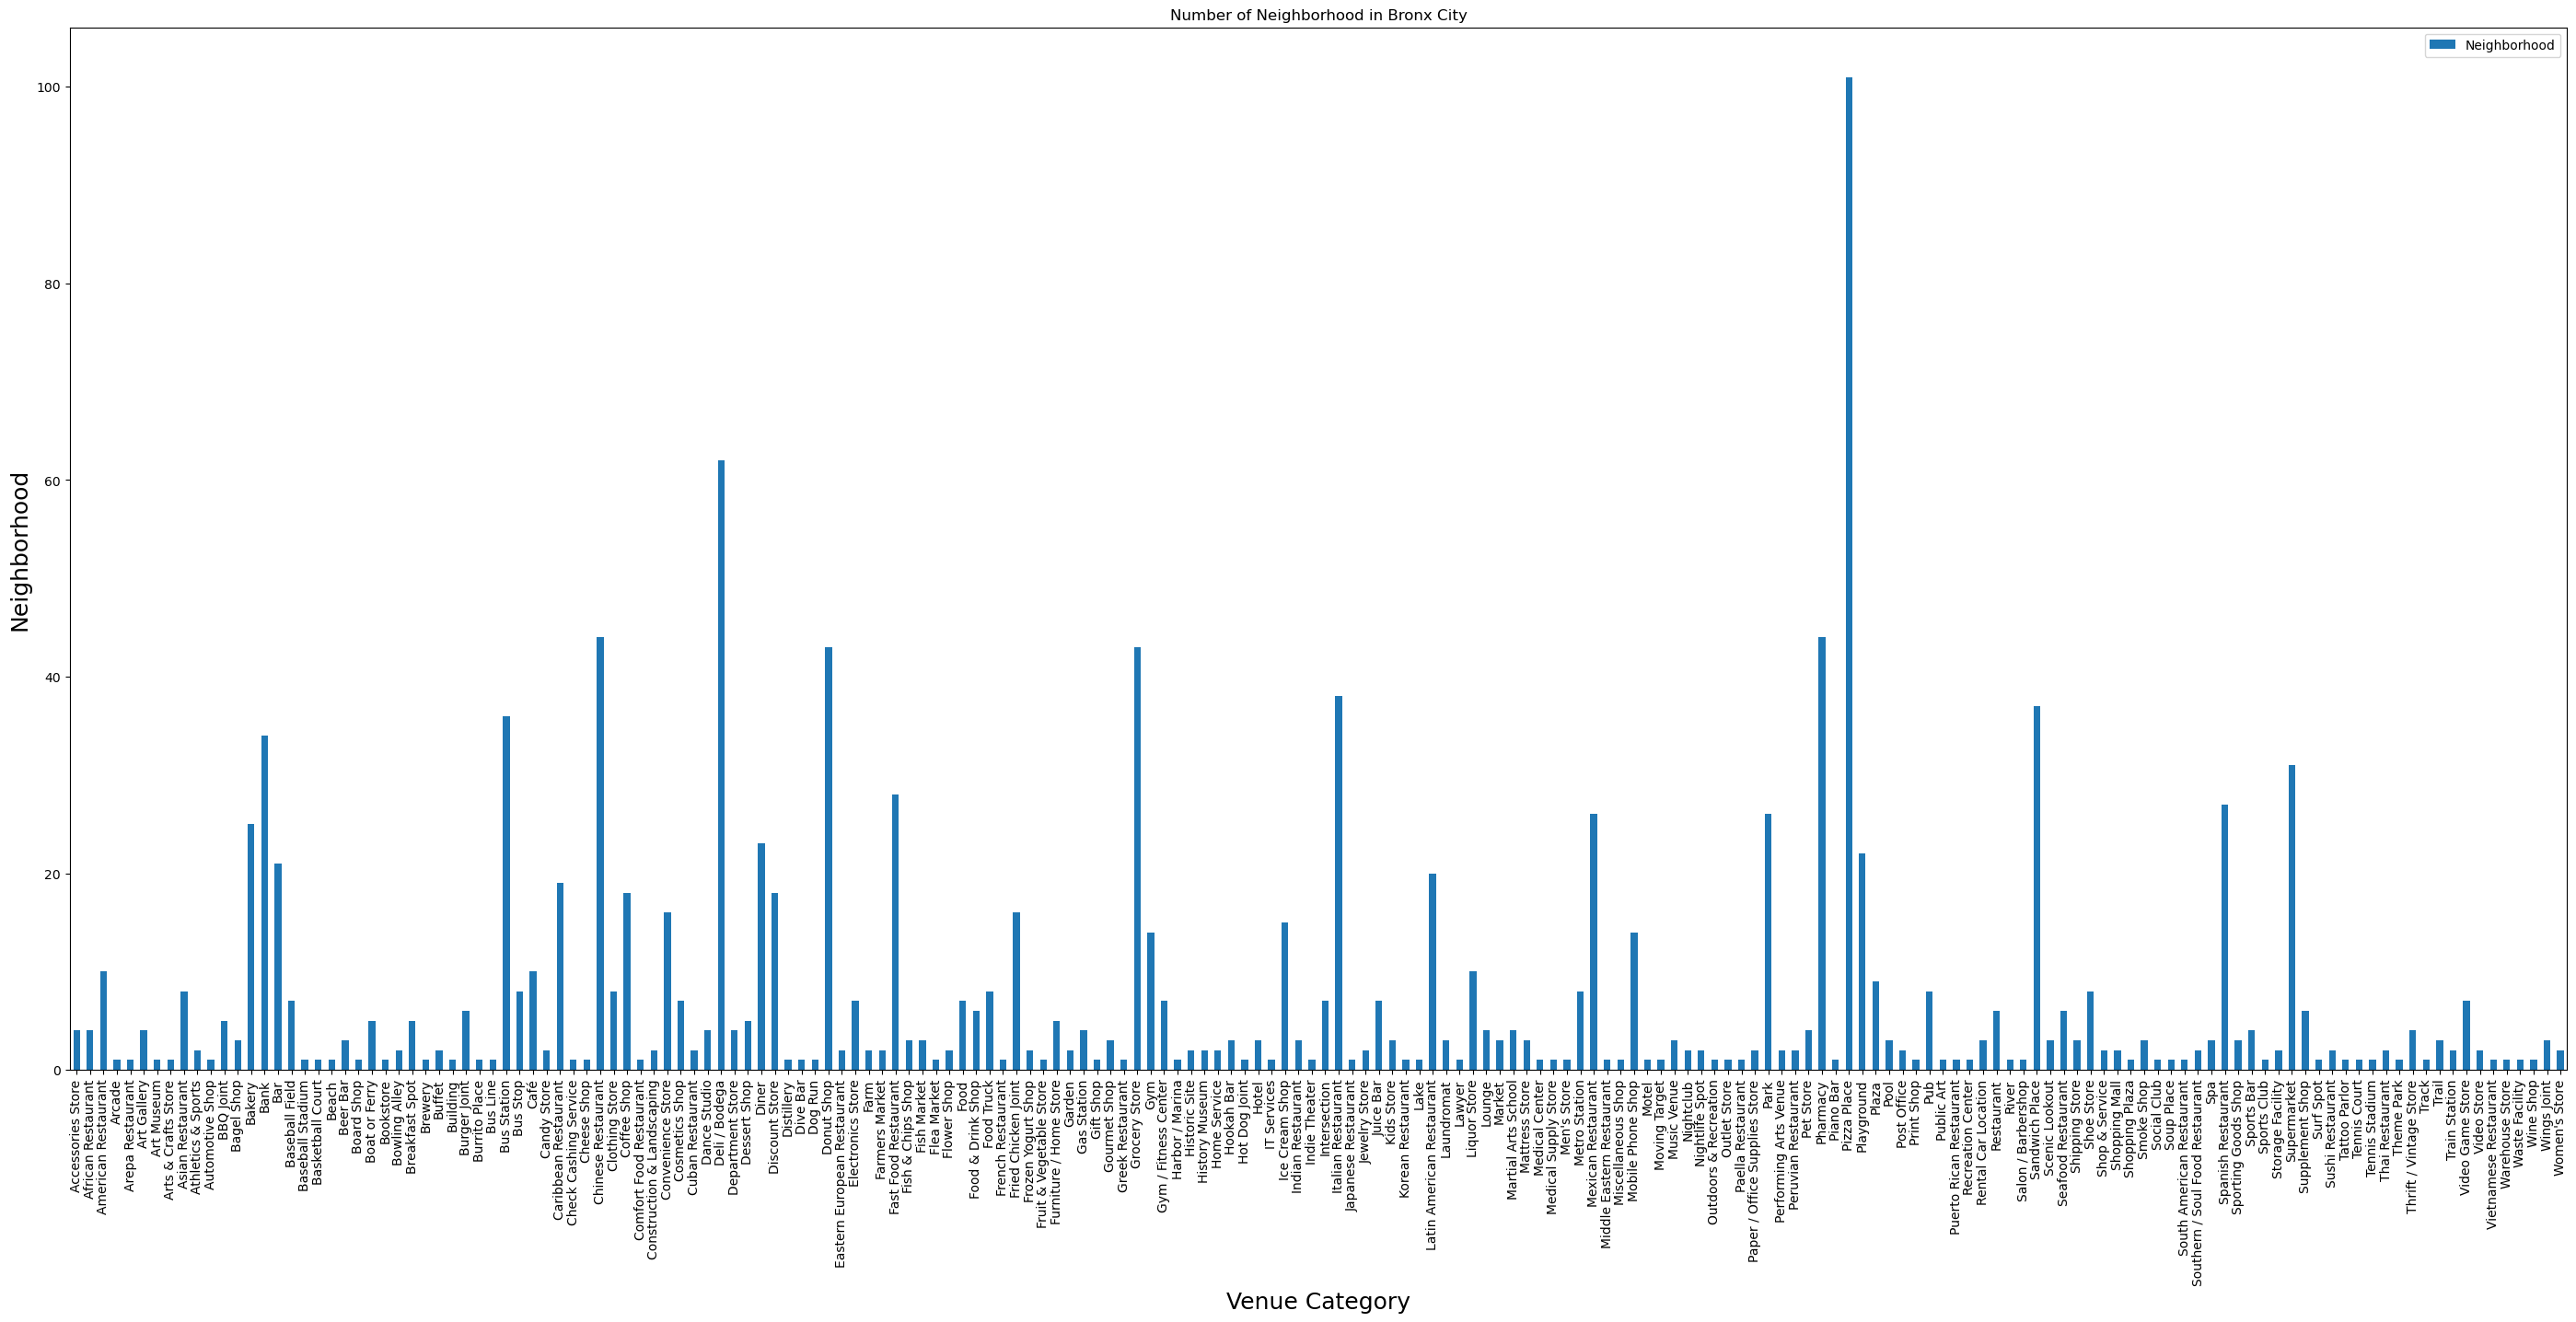

In [59]:
plt.figure(figsize=(35,15), dpi = 100)
plt.title('Number of Neighborhood in Bronx City')
#x-axis
plt.xlabel('Venue Category', fontsize = 18)
#y-axis
plt.ylabel('Neighborhood', fontsize = 18)
bronx_venues.groupby('Venue Category')['Neighborhood'].count().plot(kind='bar').alpha=0.75
plt.legend()
plt.show()

### Staten Island

In [60]:
staten_data = new_york_data[new_york_data['Borough'] == 'Staten Island'].reset_index(drop=True)
staten_data.head()

Borough   Neighborhood   Latitude  Longitude
0  Staten Island     St. George  40.644982 -74.079353
1  Staten Island   New Brighton  40.640615 -74.087017
2  Staten Island      Stapleton  40.626928 -74.077902
3  Staten Island       Rosebank  40.615305 -74.069805
4  Staten Island  West Brighton  40.631879 -74.107182

In [61]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


In [62]:
# create map of Staten using latitude and longitude values
map_staten = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(staten_data['Latitude'], staten_data['Longitude'], staten_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_staten)  
    
map_staten

<Figure size 8900x4500 with 0 Axes>

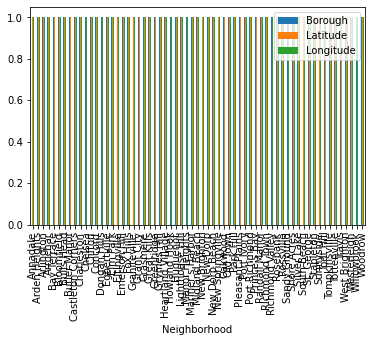

In [63]:
plt.figure(figsize=(89,45),dpi = 100)
staten_data.groupby('Neighborhood').count().plot(kind='bar').alpha=0.75


In [64]:
staten_data.loc[0, 'Neighborhood']

'St. George'

In [65]:
neighborhood_latitude = staten_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = staten_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = staten_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of St. George are 40.6449815710044, -74.07935312512797.


In [66]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NXPZV2ACYNRRU4KSQB1SSIA1HRFGX3ZMVF3AW03PISP2VYON&client_secret=KNO3YGVFCDJJ5QXFGFAW0IAEXNA1L2GSOGWZ2QHG02UYPVCO&v=20180605&ll=40.6449815710044,-74.07935312512797&radius=500&limit=100'

In [67]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc0810446cb367b6e077c28'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 35,
  'suggestedBounds': {'ne': {'lat': 40.6494815755044,
    'lng': -74.07343346476772},
   'sw': {'lat': 40.6404815665044, 'lng': -74.08527278548821}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a214841f964a520cd7c1fe3',
       'name': 'Beso',
       'location': {'address': '11 Schuyler St',
        'crossStreet': 'btwn Richmond Terrace & Stuyvesant Pl',
        'lat': 40.64330638739738,
        'lng': 

In [68]:
staten_venues = getNearbyVenues(names=staten_data['Neighborhood'],
                                   latitudes=staten_data['Latitude'],
                                   longitudes=staten_data['Longitude']
                                  )

St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


In [69]:
staten_venues.shape

(886, 7)

In [70]:
staten_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                              
Annadale                              12                      12     12   
Arden Heights                          6                       6      6   
Arlington                              7                       7      7   
Arrochar                              24                      24     24   
Bay Terrace                           12                      12     12   
Bloomfield                             4                       4      4   
Bulls Head                            46                      46     46   
Butler Manor                           5                       5      5   
Castleton Corners                     17                      17     17   
Charleston                            27                      27     27   
Chelsea                                6                       6      6   
Clifton                               20                      20     20   
Concord                                9                       9      9   
Dongan Hills                          23                      23     23   
Egbertville                            6                       6      6   
Elm Park                              12                      12     12   
Eltingville                           38                      38     38   
Emerson Hill                           3                       3      3   
Fox Hills                              5                       5      5   
Graniteville                           2                       2      2   
Grant City                            22                      22     22   
Grasmere                              25                      25     25   
Great Kills                           22                      22     22   
Greenridge                             9                       9      9   
Grymes Hill                            2                       2      2   
Heartland Village                     10                      10     10   
Howland Hook                           1                       1      1   
Huguenot                              11                      11     11   
Lighthouse Hill                        7                       7      7   
Manor Heights                         18                      18     18   
Mariner's Harbor                      11                      11     11   
Midland Beach                         15                      15     15   
New Brighton                          11                      11     11   
New Dorp                              23                      23     23   
New Dorp Beach                        15                      15     15   
New Springville                       26                      26     26   
Oakwood                                5                       5      5   
Old Town                              21                      21     21   
Park Hill                              7                       7      7   
Pleasant Plains                       17                      17     17   
Port Ivory                             1                       1      1   
Port Richmond                          7                       7      7   
Prince's Bay                           9                       9      9   
Randall Manor                          5                       5      5   
Richmond Town                          5                       5      5   
Richmond Valley                       12                      12     12   
Rosebank                              26                      26     26   
Rossville                             16                      16     16   
Sandy Ground                           6                       6      6   
Shore Acres                           26                      26     26   
Silver Lake                            5                       5      5   
South Beach                            8    

In [71]:
staten_venues['Venue Category'].unique()[:100]

array(['Tapas Restaurant', 'Pizza Place', 'Monument / Landmark',
       'Baseball Stadium', 'Burger Joint', 'Theater',
       'Italian Restaurant', 'Bar', 'Toy / Game Store',
       'American Restaurant', 'Sporting Goods Shop', 'Clothing Store',
       'Farmers Market', 'Outlet Mall', 'Donut Shop', 'Coffee Shop',
       'Pharmacy', 'Steakhouse', 'Plaza', 'Playground', 'Snack Place',
       'Liquor Store', 'Convenience Store', 'Harbor / Marina',
       'Scenic Lookout', 'Park', 'Tourist Information Center',
       'Discount Store', 'Bus Stop', 'Bowling Alley',
       'Chinese Restaurant', 'Deli / Bodega', 'Sandwich Place',
       'Sri Lankan Restaurant', 'Beer Bar', 'Spanish Restaurant',
       'Asian Restaurant', 'Skate Park', 'Mexican Restaurant',
       'Residential Building (Apartment / Condo)', 'Restaurant',
       'Fast Food Restaurant', 'Bank', 'Jewelry Store', 'Diner', 'Café',
       'Music Venue', 'Cosmetics Shop', 'Art Gallery',
       'Construction & Landscaping', 'Motorcycle

In [72]:
"Home Service" in staten_venues['Venue Category'].unique()

True

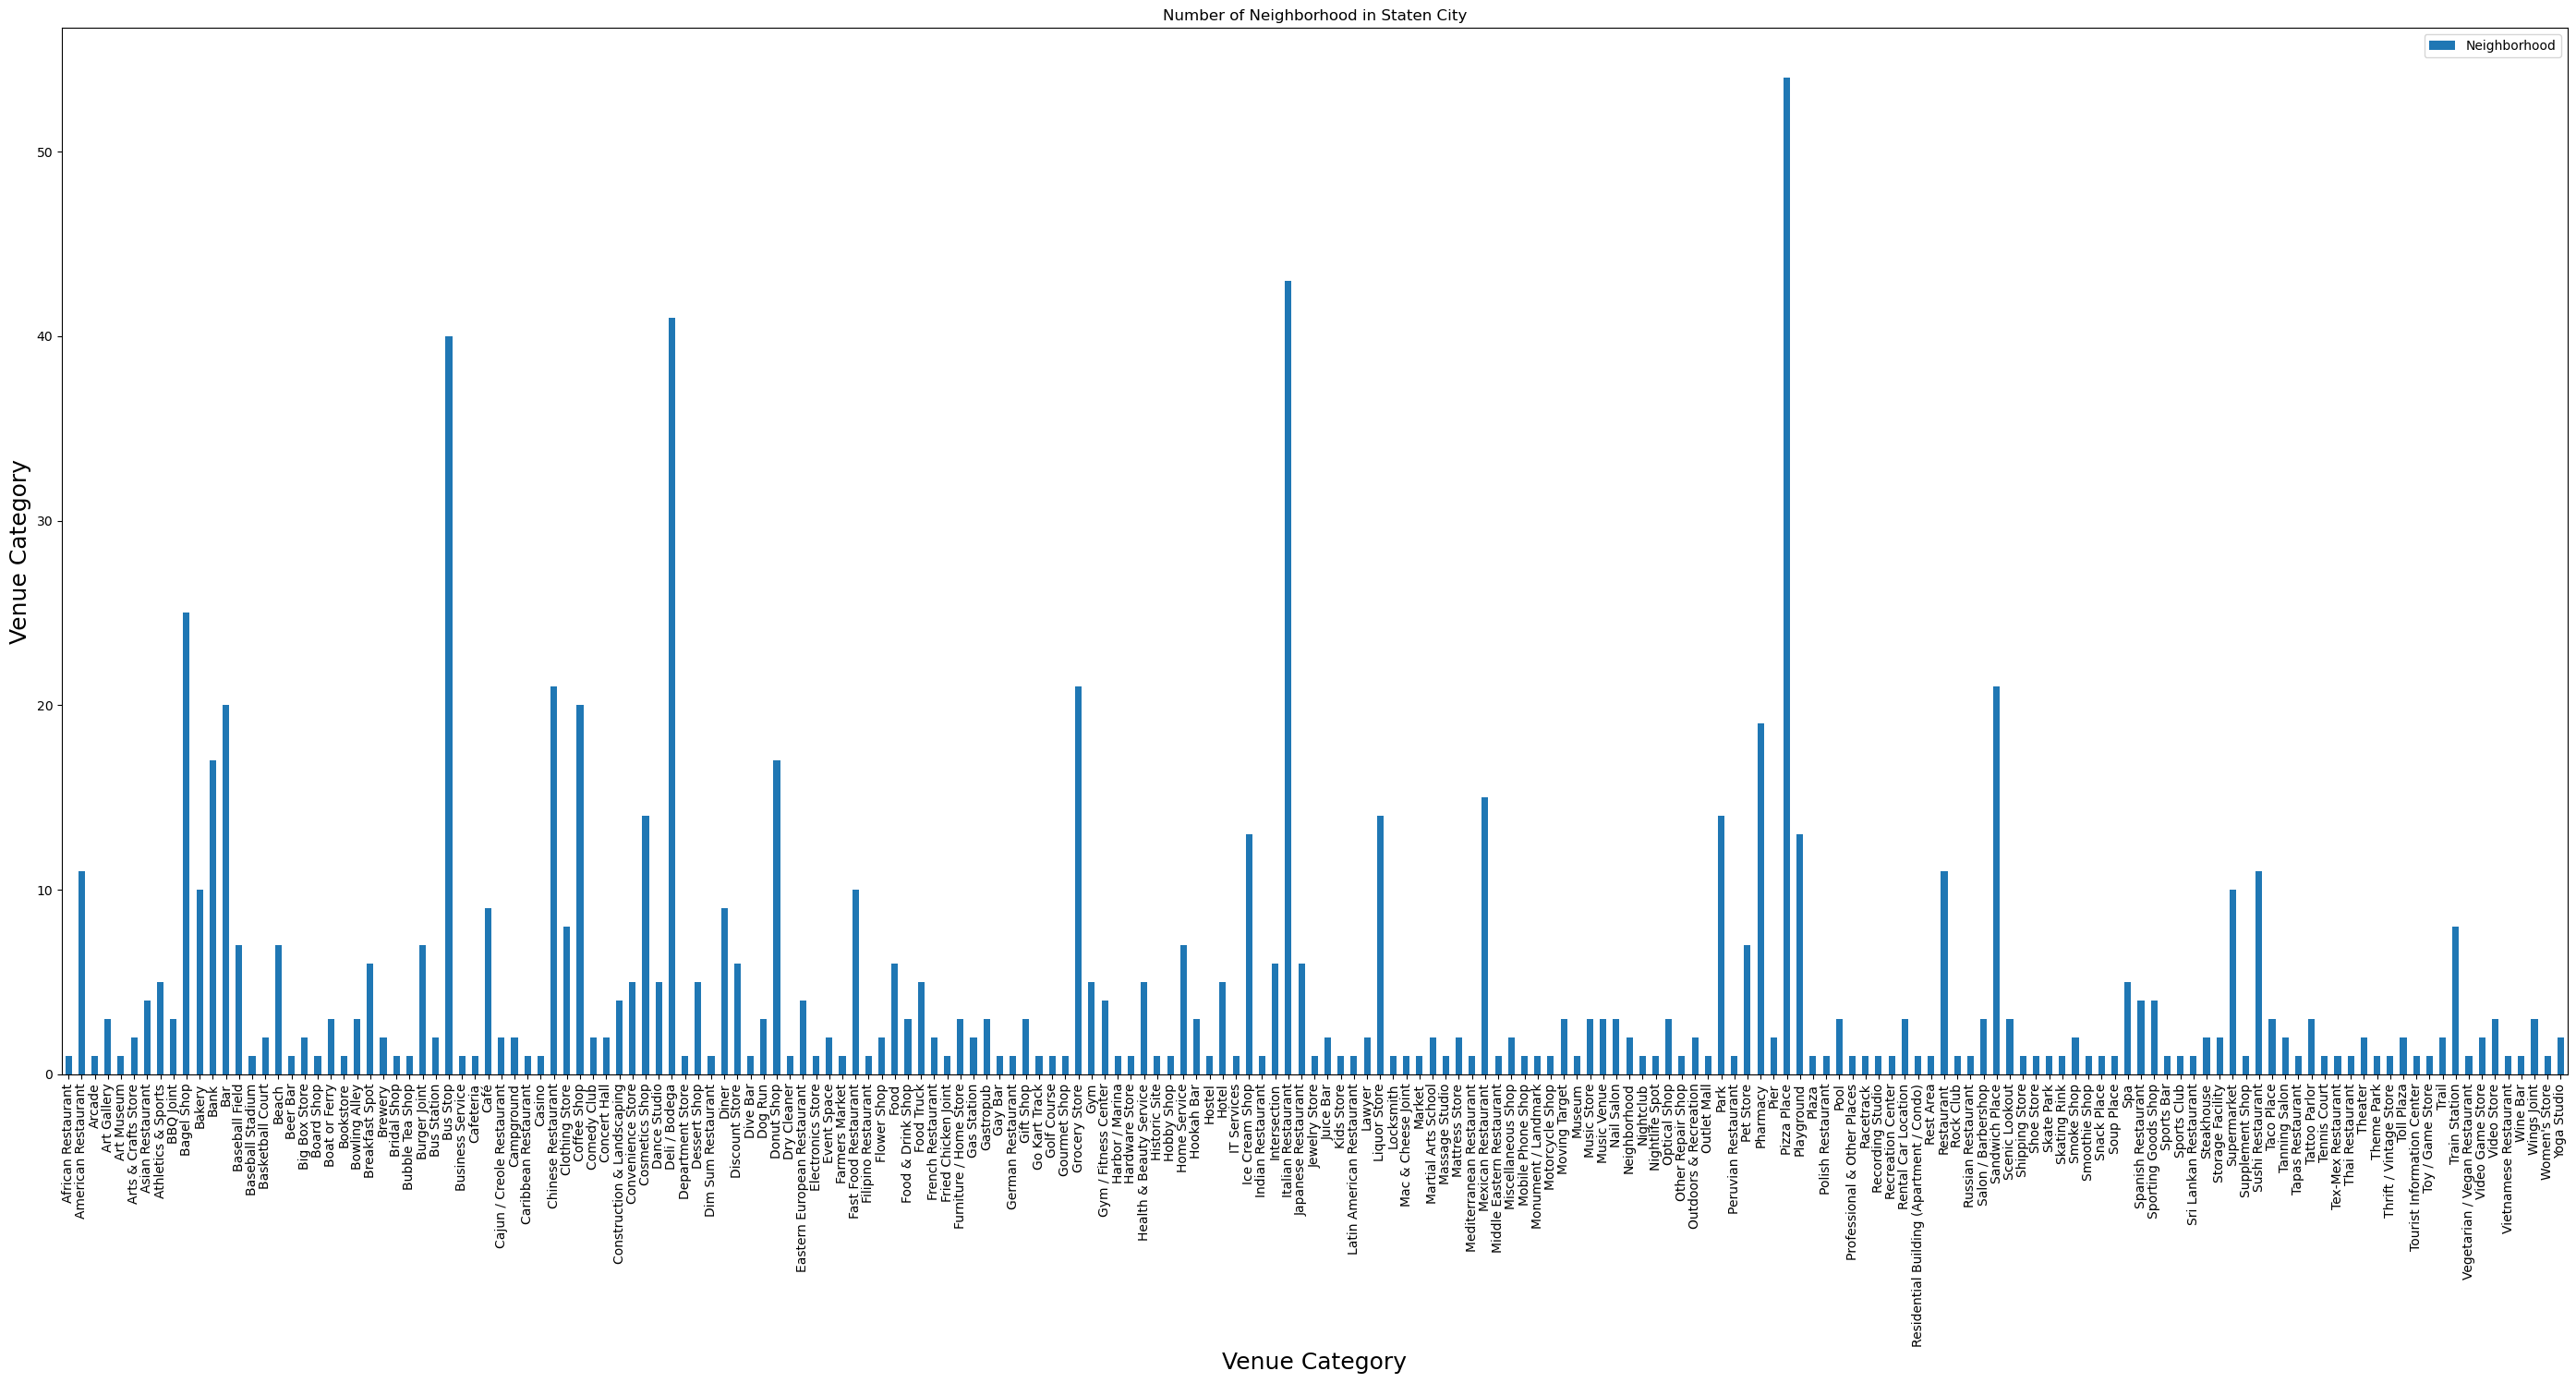

In [73]:
plt.figure(figsize=(35,15), dpi = 100)
plt.title('Number of Neighborhood in Staten City')
#x-axis
plt.xlabel('Venue Category', fontsize = 18)
#y-axis
plt.ylabel('Venue Category', fontsize = 18)
staten_venues.groupby('Venue Category')['Neighborhood'].count().plot(kind='bar').alpha=0.75
plt.legend()
plt.show()

### Queens

In [74]:
queens_data = new_york_data[new_york_data['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

Borough     Neighborhood   Latitude  Longitude
0  Queens          Astoria  40.768509 -73.915654
1  Queens         Woodside  40.746349 -73.901842
2  Queens  Jackson Heights  40.751981 -73.882821
3  Queens         Elmhurst  40.744049 -73.881656
4  Queens     Howard Beach  40.654225 -73.838138

In [75]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


In [76]:
# create map of Queens using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

<Figure size 9900x4500 with 0 Axes>

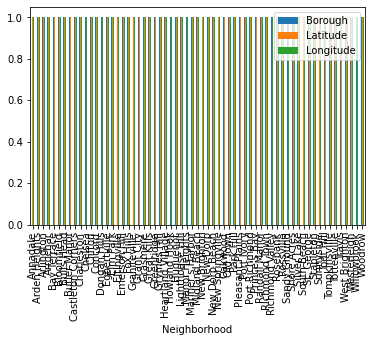

In [77]:
plt.figure(figsize=(99,45),dpi = 100)
staten_data.groupby('Neighborhood').count().plot(kind='bar').alpha=0.75

In [78]:
queens_data.loc[0, 'Neighborhood']

'Astoria'

In [79]:
neighborhood_latitude = queens_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = queens_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = queens_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Astoria are 40.76850859335492, -73.91565374304234.


In [80]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NXPZV2ACYNRRU4KSQB1SSIA1HRFGX3ZMVF3AW03PISP2VYON&client_secret=KNO3YGVFCDJJ5QXFGFAW0IAEXNA1L2GSOGWZ2QHG02UYPVCO&v=20180605&ll=40.76850859335492,-73.91565374304234&radius=500&limit=100'

In [81]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc087f4da740e58ce3bdf91'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Astoria',
  'headerFullLocation': 'Astoria, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 101,
  'suggestedBounds': {'ne': {'lat': 40.773008597854925,
    'lng': -73.90972309237958},
   'sw': {'lat': 40.76400858885492, 'lng': -73.9215843937051}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bdf502a89ca76b062b75d5e',
       'name': 'Favela Grill',
       'location': {'address': '33-18 28th Ave',
        'crossStreet': 'btwn 33rd & 34th St.',
        'lat': 40.76734843380796,
        'lng': -73.9178974

In [82]:
queens_venues = getNearbyVenues(names=queens_data['Neighborhood'],
                                   latitudes=queens_data['Latitude'],
                                   longitudes=queens_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [83]:
queens_venues.shape

(2201, 7)

In [84]:
queens_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                 
Arverne                                  21                      21     21   
Astoria                                 100                     100    100   
Astoria Heights                          13                      13     13   
Auburndale                               20                      20     20   
Bay Terrace                              38                      38     38   
Bayside                                  72                      72     72   
Bayswater                                 1                       1      1   
Beechhurst                               18                      18     18   
Bellaire                                 14                      14     14   
Belle Harbor                             23                      23     23   
Bellerose                                21                      21     21   
Blissville                               23                      23     23   
Breezy Point                              4                       4      4   
Briarwood                                12                      12     12   
Broad Channel                             9                       9      9   
Brookville                                2                       2      2   
Cambria Heights                          13                      13     13   
College Point                            48                      48     48   
Corona                                   20                      20     20   
Douglaston                               27                      27     27   
East Elmhurst                            15                      15     15   
Edgemere                                 17                      17     17   
Elmhurst                                 36                      36     36   
Far Rockaway                             30                      30     30   
Floral Park                               7                       7      7   
Flushing                                 62                      62     62   
Forest Hills                             40                      40     40   
Forest Hills Gardens                     21                      21     21   
Fresh Meadows                            15                      15     15   
Glen Oaks                                22                      22     22   
Glendale                                  5                       5      5   
Hammels                                  19                      19     19   
Hillcrest                                16                      16     16   
Hollis                                   18                      18     18   
Holliswood                                6                       6      6   
Howard Beach                             37                      37     37   
Hunters Point                            70                      70     70   
Jackson Heights                          82                      82     82   
Jamaica Center                           44                      44     44   
Jamaica Estates                           4                       4      4   
Jamaica Hills                            26                      26     26   
Kew Gardens                              50                      50     50   
Kew Gardens Hills                        17                      17     17   
Laurelton                                 6                       6      6   
Lefrak City                              22                      22     22   
Lindenwood                               11                      11     11   
Little Neck                              53                      53     53   
Long Island City                         72                      72     72   
Malba                                     3                       3      3   
Maspeth                                  33 

In [85]:
queens_venues['Venue Category'].unique()[:100]

array(['Brazilian Restaurant', 'Gourmet Shop', 'Gym',
       'Seafood Restaurant', 'Middle Eastern Restaurant',
       'Martial Arts School', 'Pub', 'Indian Restaurant', 'Restaurant',
       'Dessert Shop', 'Falafel Restaurant', 'Ice Cream Shop', 'Bakery',
       'Bagel Shop', 'Mediterranean Restaurant', 'Mexican Restaurant',
       'Bar', 'Salad Place', 'Pizza Place', 'Greek Restaurant',
       'Korean Restaurant', 'Health & Beauty Service', 'Grocery Store',
       'Japanese Restaurant', 'Food Truck', 'Hookah Bar',
       'Italian Restaurant', 'Thai Restaurant',
       'Vegetarian / Vegan Restaurant', 'Beer Garden', 'Food',
       'Poke Place', 'Bubble Tea Shop', 'Diner', 'Souvlaki Shop',
       'Cocktail Bar', 'BBQ Joint', 'Cajun / Creole Restaurant', 'Spa',
       'Gym / Fitness Center', 'Comfort Food Restaurant',
       'Food & Drink Shop', 'Coffee Shop', 'Sandwich Place',
       'Burger Joint', 'Juice Bar', 'Deli / Bodega',
       'Latin American Restaurant', 'Wine Shop', 'Café',


In [86]:
"Restaurant" in queens_venues['Venue Category'].unique()

True

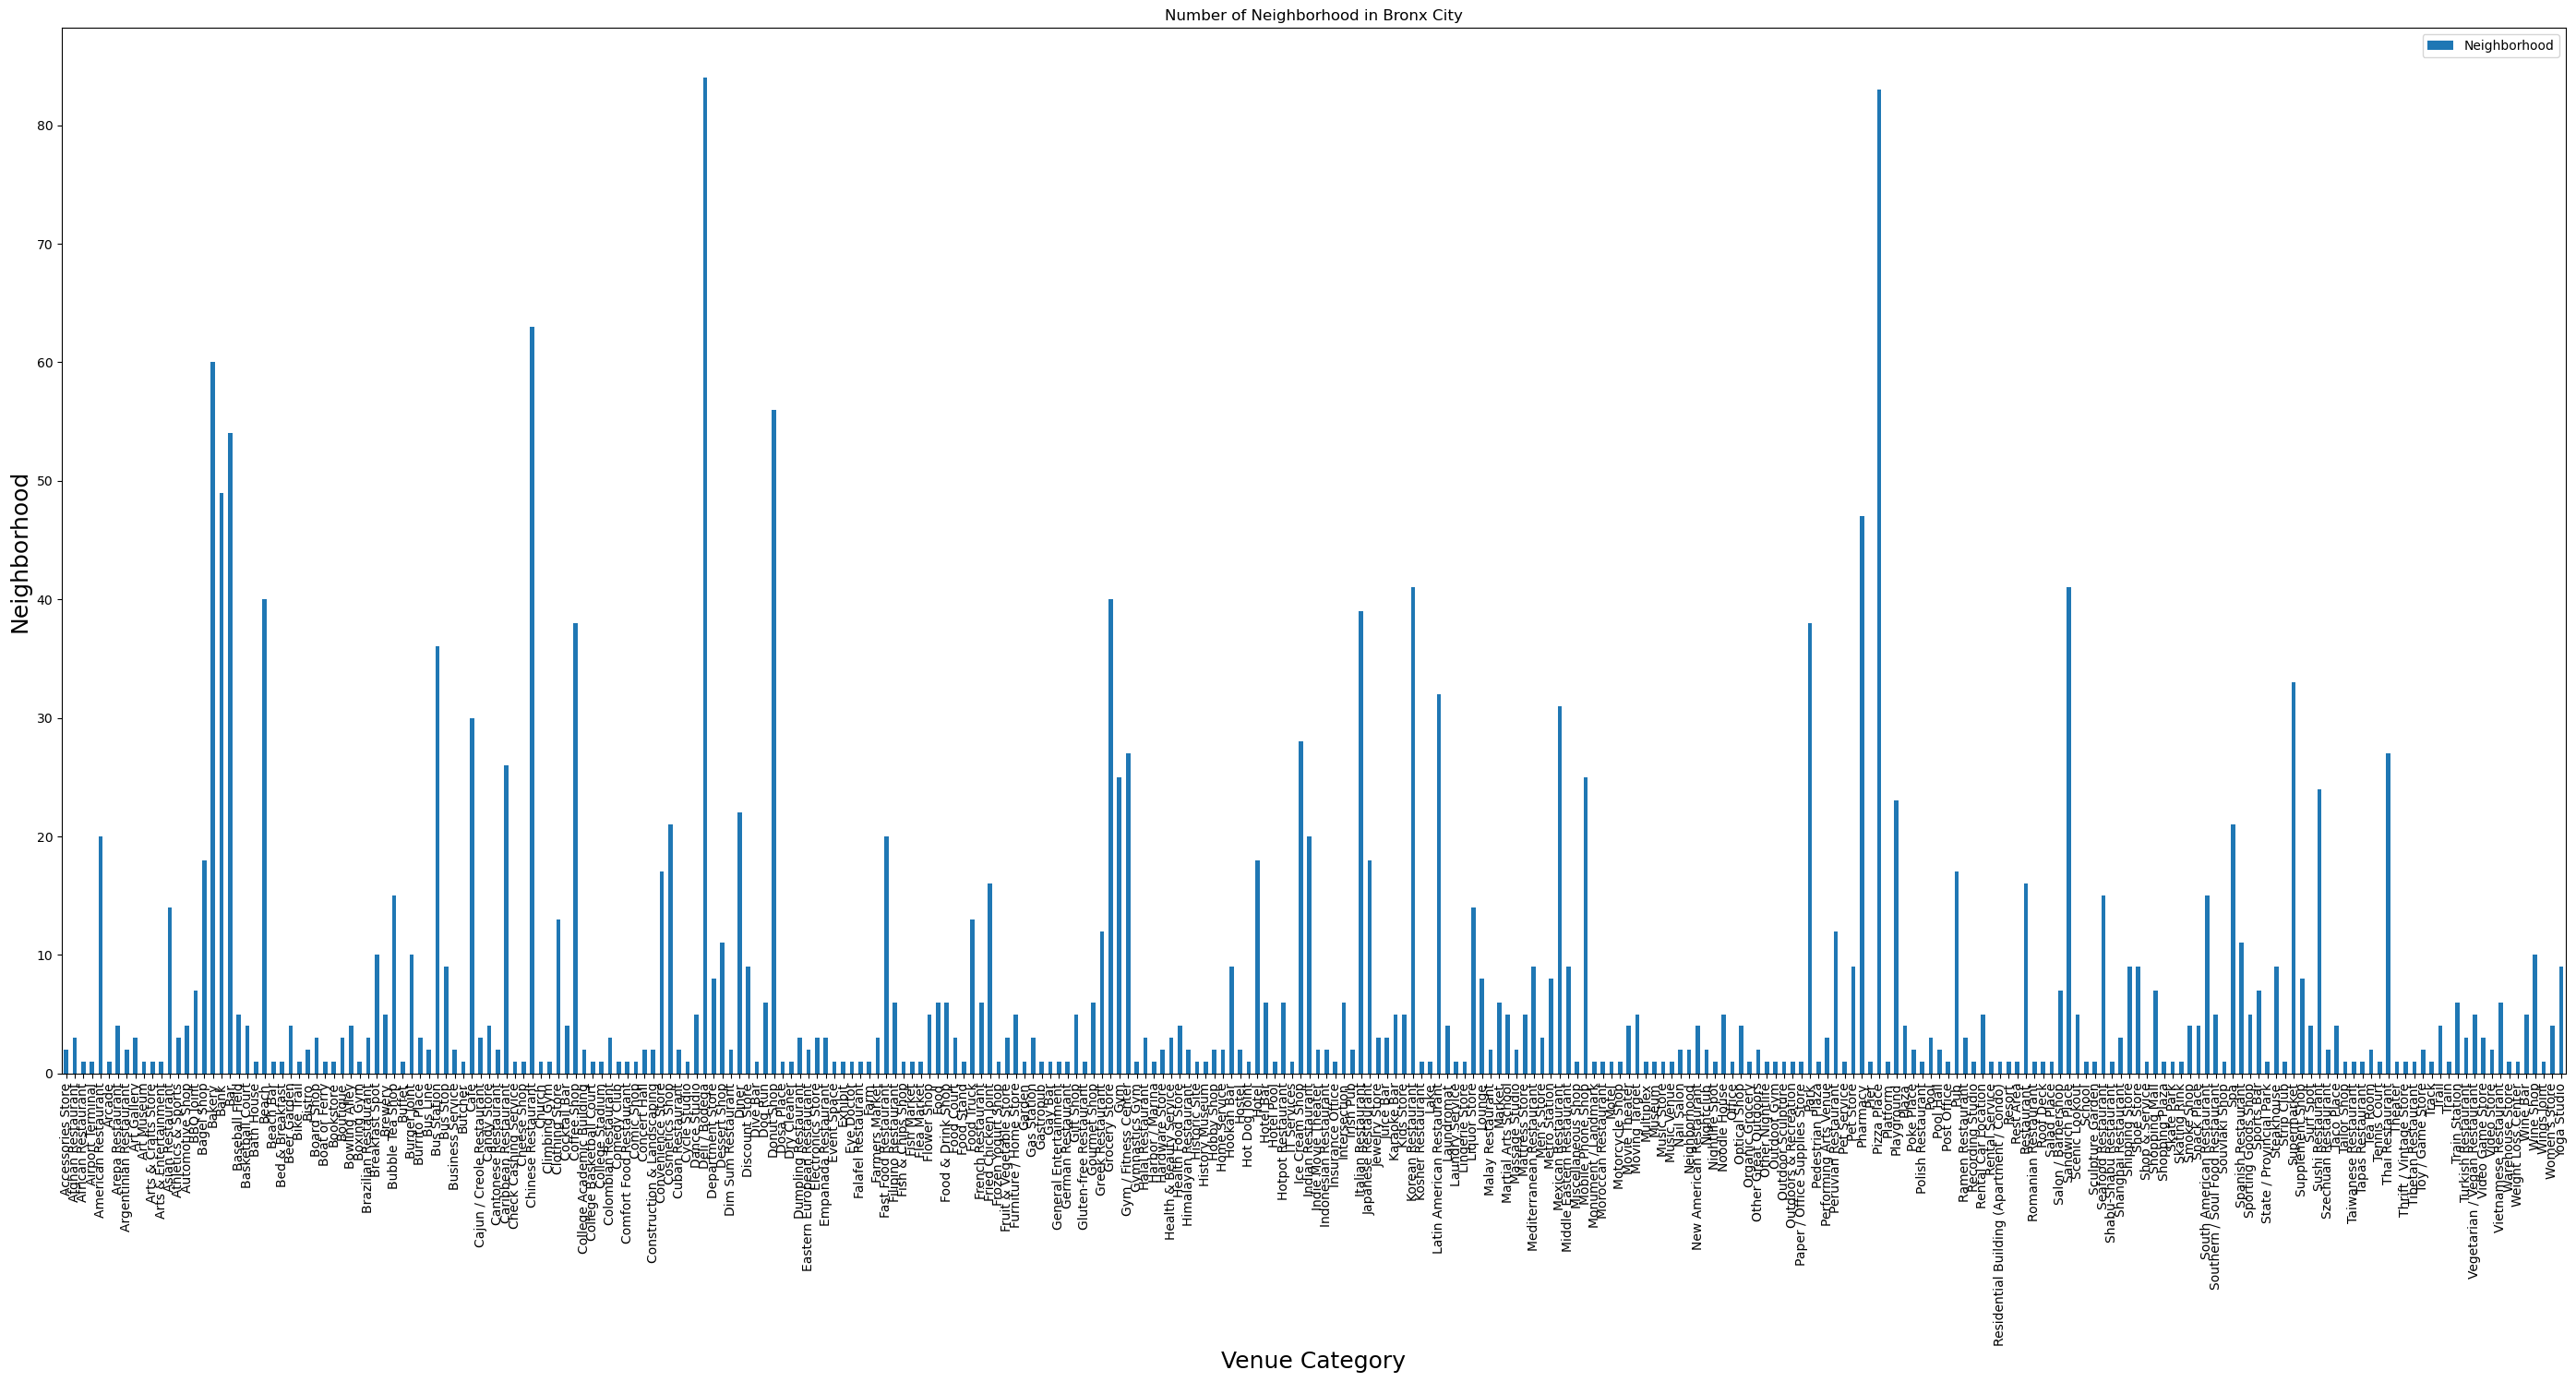

In [87]:
plt.figure(figsize=(35,15), dpi = 100)
plt.title('Number of Neighborhood in Bronx City')
#x-axis
plt.xlabel('Venue Category', fontsize = 18)
#y-axis
plt.ylabel('Neighborhood', fontsize = 18)
queens_venues.groupby('Venue Category')['Neighborhood'].count().plot(kind='bar').alpha=0.75
plt.legend()
plt.show()

### Manhatten

In [88]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  African Restaurant  \
0  Marble Hill                  0               0                   0   
1  Marble Hill                  0               0                   0   
2  Marble Hill                  0               0                   0   
3  Marble Hill                  0               0                   0   
4  Marble Hill                  0               0                   0   

   American Restaurant  Antique Shop  Arepa Restaurant  \
0                    0             0                 0   
1                    0             0                 0   
2                    0             0                 0   
3                    0             0                 0   
4                    0             0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0                 0                   0           0                      0   
1                 0                   0           0                      0   
2                 0                   0           0                      0   
3                 0                   0           0                      0   
4                 0                   0           0                      0   

   Austrian Restaurant  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0                    0          0           0           0       0     0    0   
1                    0          0           0           0       0     0    0   
2                    0          0           0           0       0     0    0   
3                    0          0           0           0       0     0    0   
4                    0          0           0           0       0     0    0   

   Baseball Field  Basketball Court  Beer Bar  Beer Garden  Beer Store  \
0               0                 0         0            0           0   
1               0                 0         0            0           0   
2               0                 0         0            0           0   
3               0                 0         0            0           0   
4               0                 0         0            0           0   

   Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  Board Shop  \
0                         0          0           0       0           0   
1                         0          0           0       0           0   
2                         0          0           0       0           0   
3                         0          0           0       0           0   
4                         0          0           0       0           0   

   Boat or Ferry  Bookstore  Boutique  Boxing Gym  Brazilian Restaurant  \
0              0          0         0           0                     0   
1              0          0         0           0                     0   
2              0          0         0           0                     0   
3              0          0         0           0                     0   
4              0          0         0           0                     0   

   Breakfast Spot  Bridal Shop  Bridge  Bubble Tea Shop  Building  \
0               0            0       0                0         0   
1               0            0       0                0         0   
2               0            0       0                0         0   
3               0            0       0                0         0   
4               0            0       0                0         0   

   Burger Joint  Burrito Place  Bus Line  Bus Station  Bu

In [89]:
manhattan_onehot.shape

(3219, 324)

In [90]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

Neighborhood  Accessories Store  Adult Boutique  \
0     Battery Park City           0.000000            0.00   
1         Carnegie Hill           0.000000            0.00   
2        Central Harlem           0.000000            0.00   
3               Chelsea           0.000000            0.00   
4             Chinatown           0.000000            0.00   
5          Civic Center           0.000000            0.00   
6               Clinton           0.000000            0.00   
7           East Harlem           0.000000            0.00   
8          East Village           0.000000            0.00   
9    Financial District           0.000000            0.00   
10             Flatiron           0.000000            0.00   
11             Gramercy           0.000000            0.00   
12    Greenwich Village           0.010000            0.00   
13     Hamilton Heights           0.000000            0.00   
14         Hudson Yards           0.000000            0.00   
15               Inwood           0.000000            0.00   
16           Lenox Hill           0.000000            0.00   
17       Lincoln Square           0.000000            0.00   
18         Little Italy           0.000000            0.00   
19      Lower East Side           0.000000            0.00   
20     Manhattan Valley           0.000000            0.00   
21       Manhattanville           0.000000            0.00   
22          Marble Hill           0.000000            0.00   
23              Midtown           0.000000            0.00   
24        Midtown South           0.000000            0.00   
25  Morningside Heights           0.000000            0.00   
26          Murray Hill           0.000000            0.00   
27                 Noho           0.000000            0.00   
28     Roosevelt Island           0.000000            0.00   
29                 Soho           0.000000            0.00   
30      Stuyvesant Town           0.000000            0.00   
31         Sutton Place           0.000000            0.01   
32              Tribeca           0.000000            0.00   
33           Tudor City           0.000000            0.00   
34           Turtle Bay           0.000000            0.00   
35      Upper East Side           0.000000            0.00   
36      Upper West Side           0.010204            0.00   
37   Washington Heights           0.011765            0.00   
38         West Village           0.010000            0.00   
39            Yorkville           0.000000            0.00   

    African Restaurant  American Restaurant  Antique Shop  Arepa Restaurant  \
0             0.000000             0.000000          0.00          0.000000   
1             0.000000             0.000000          0.00          0.000000   
2             0.065217             0.043478          0.00          0.000000   
3             0.000000             0.040000          0.00          0.000000   
4             0.000000             0.040000          0.00          0.000000   
5             0.000000             0.030000          0.01          0.000000   
6             0.000000             0.050000          0.00          0.000000   
7             0.000000             0.000000          0.00          0.000000   
8             0.000000             0.010000          0.00          0.000000   
9             0.000000             0.030000          0.00          0.000000   
10            0.000000             0.030000          0.00          0.000000   
11            0.000000             0.042553          0.00          0.000000   
12            0.000000             0.030000          0.00          0.000000   
13            0.000000             0.000000          0.00          0.000000   
14            0.000000             0.047619          0.00          0.000000   
15            0.000000             0.017241          0.00          0.000000   
16            0.000000             0.000000          0.00          0.000000   
17            0.000000             0.021277   

In [91]:
manhattan_grouped.shape

(40, 324)

In [92]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.09
1          Hotel  0.08
2    Coffee Shop  0.06
3            Gym  0.06
4  Memorial Site  0.05


----Carnegie Hill----
                venue  freq
0         Coffee Shop  0.09
1                Café  0.05
2  Italian Restaurant  0.03
3   French Restaurant  0.03
4                 Gym  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1                  Bar  0.07
2    French Restaurant  0.04
3  American Restaurant  0.04
4       Cosmetics Shop  0.04


----Chelsea----
                 venue  freq
0          Coffee Shop  0.09
1          Art Gallery  0.05
2  American Restaurant  0.04
3               Bakery  0.04
4   Italian Restaurant  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.07
1         Dessert Shop  0.05
2         Cocktail Bar  0.05
3               Bakery  0.05
4  American Restaurant  0.04


----Civic Center----
                  venue  freq
0     

In [93]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [94]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City                  Park                 Hotel   
1      Carnegie Hill           Coffee Shop                  Café   
2     Central Harlem    African Restaurant                   Bar   
3            Chelsea           Coffee Shop           Art Gallery   
4          Chinatown    Chinese Restaurant          Cocktail Bar   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Gym           Coffee Shop         Memorial Site   
1             Bookstore    Italian Restaurant  Gym / Fitness Center   
2     French Restaurant   American Restaurant    Chinese Restaurant   
3                Bakery   American Restaurant        Ice Cream Shop   
4          Dessert Shop                Bakery   American Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Shopping Mall                 Plaza          Burger Joint   
1                   Gym     French Restaurant           Yoga Studio   
2    Seafood Restaurant        Cosmetics Shop             Cafeteria   
3    Italian Restaurant   Japanese Restaurant                  Park   
4    Salon / Barbershop                   Spa          Noodle House   

  9th Most Common Venue 10th Most Common Venue  
0          Gourmet Shop             Playground  
1             Wine Shop  Vietnamese Restaurant  
2         Grocery Store                Library  
3          Cycle Studio           Cupcake Shop  
4          Optical Shop      Hotpot Restaurant

In [95]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 3, 0, 1], dtype=int32)

In [96]:
## add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               4   
1  Manhattan           Chinatown  40.715618 -73.994279               1   
2  Manhattan  Washington Heights  40.851903 -73.936900               0   
3  Manhattan              Inwood  40.867684 -73.921210               3   
4  Manhattan    Hamilton Heights  40.823604 -73.949688               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   Gym        Discount Store           Coffee Shop   
1    Chinese Restaurant          Cocktail Bar          Dessert Shop   
2                  Café                Bakery         Grocery Store   
3    Mexican Restaurant                Lounge            Restaurant   
4           Pizza Place           Coffee Shop                  Café   

       4th Most Common Venue 5th Most Common Venue    6th Most Common Venue  \
0             Sandwich Place           Yoga Studio              Pizza Place   
1                     Bakery   American Restaurant       Salon / Barbershop   
2  Latin American Restaurant         Deli / Bodega  New American Restaurant   
3                       Café    Frozen Yogurt Shop            Deli / Bodega   
4         Mexican Restaurant          Cocktail Bar        Indian Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0         Deli / Bodega      Department Store              Pharmacy   
1                   Spa          Noodle House          Optical Shop   
2            Donut Shop     Mobile Phone Shop    Chinese Restaurant   
3           Pizza Place              Wine Bar  Caribbean Restaurant   
4          Liquor Store      Sushi Restaurant                  Park   

  10th Most Common Venue  
0                  Diner  
1      Hotpot Restaurant  
2         Sandwich Place  
3                   Park  
4          Deli / Bodega

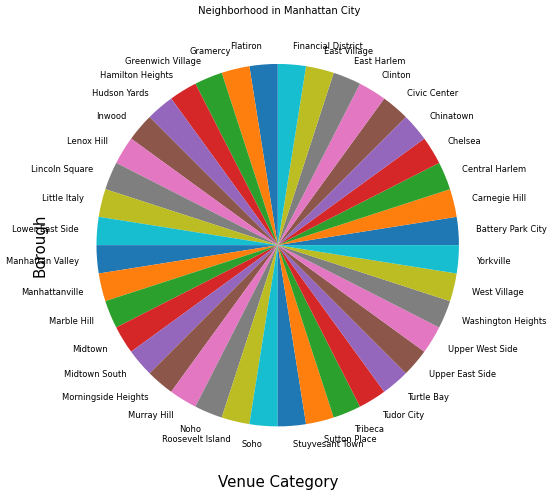

In [98]:
plt.figure(figsize=(14,10), dpi = 60)
plt.title(' Neighborhood in Manhattan City')
#x-axis
plt.xlabel('Venue Category', fontsize = 18)
#y-axis
plt.ylabel('Neighborhood', fontsize = 18)
manhattan_merged.groupby('Neighborhood')['Borough'].count().plot(kind='pie').alpha=0.75



In [99]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Brooklyn

In [100]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

Yoga Studio  Accessories Store  African Restaurant  American Restaurant  \
0            0                  0                   0                    0   
1            0                  0                   0                    0   
2            0                  0                   0                    0   
3            0                  0                   0                    0   
4            0                  0                   0                    0   

   Antique Shop  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0             0                 0                       0            0   
1             0                 0                       0            0   
2             0                 0                       0            0   
3             0                 0                       0            0   
4             0                 0                       0            0   

   Art Museum  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0           0                    0                     0                 0   
1           0                    0                     0                 0   
2           0                    0                     0                 0   
3           0                    0                     0                 0   
4           0                    0                     0                 0   

   Athletics & Sports  Auto Garage  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
0                   0            0          0           0       0     0    0   
1                   0            0          0           1       0     0    0   
2                   0            0          0           0       0     0    0   
3                   0            0          0           0       0     0    0   
4                   0            0          0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Beach  Bed & Breakfast  \
0               0                 0                 0      0                0   
1               0                 0                 0      0                0   
2               0                 0                 0      0                0   
3               0                 0                 0      0                0   
4               0                 0                 0      0                0   

   Beer Bar  Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0         0            0           0              0                         0   
1         0            0           0              0                         0   
2         0            0           0              0                         0   
3         0            0           0              0                         0   
4         0            0           0              0                         0   

   Bike Shop  Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0          0       0           0              0          0         0   
1          0       0           0              0          0         0   
2          0       0           0              0          0         0   
3          0       0           0              0          0         0   
4          0       0           0              0          0         0   

   Boxing Gym  Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  Buffet  \
0           0               0        0       0                0       0   
1           0               0        0       0                0       0   
2           0               0        0       0                0       0   
3           0               0        0       0                0       0   
4           0               1        0       0                0       0   

   Burger Joint  Burmese Restaurant  Burrito Place  Bus Line  Bus Station  \
0             0                   0              0         0            0   
1             0                   0              0         0            0   
2             0                   0              0

In [101]:
brooklyn_onehot.shape

(2868, 296)

In [102]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                  Bath Beach     0.000000           0.000000   
1                   Bay Ridge     0.012048           0.000000   
2          Bedford Stuyvesant     0.000000           0.000000   
3                 Bensonhurst     0.000000           0.000000   
4                Bergen Beach     0.000000           0.000000   
5                 Boerum Hill     0.021739           0.000000   
6                Borough Park     0.000000           0.000000   
7              Brighton Beach     0.000000           0.000000   
8           Broadway Junction     0.000000           0.000000   
9            Brooklyn Heights     0.040000           0.000000   
10                Brownsville     0.000000           0.000000   
11                   Bushwick     0.000000           0.000000   
12                   Canarsie     0.000000           0.000000   
13            Carroll Gardens     0.000000           0.000000   
14                  City Line     0.000000           0.000000   
15               Clinton Hill     0.031915           0.000000   
16                Cobble Hill     0.033708           0.000000   
17               Coney Island     0.000000           0.000000   
18              Crown Heights     0.000000           0.000000   
19              Cypress Hills     0.000000           0.000000   
20                Ditmas Park     0.017241           0.000000   
21                   Downtown     0.010000           0.000000   
22                      Dumbo     0.030303           0.000000   
23              Dyker Heights     0.000000           0.000000   
24              East Flatbush     0.000000           0.000000   
25              East New York     0.000000           0.000000   
26          East Williamsburg     0.000000           0.000000   
27                    Erasmus     0.034483           0.000000   
28                   Flatbush     0.000000           0.000000   
29                  Flatlands     0.000000           0.000000   
30                Fort Greene     0.030769           0.000000   
31              Fort Hamilton     0.000000           0.000000   
32               Fulton Ferry     0.000000           0.000000   
33                 Georgetown     0.000000           0.000000   
34            Gerritsen Beach     0.000000           0.000000   
35                    Gowanus     0.014706           0.000000   
36                  Gravesend     0.000000           0.000000   
37                 Greenpoint     0.030000           0.000000   
38              Highland Park     0.000000           0.000000   
39                  Homecrest     0.000000           0.000000   
40                 Kensington     0.000000           0.000000   
41                    Madison     0.000000           0.000000   
42            Manhattan Beach     0.000000           0.000000   
43          Manhattan Terrace     0.000000           0.000000   
44                Marine Park     0.000000           0.000000   
45                    Midwood     0.000000           0.000000   
46                 Mill Basin     0.000000           0.000000   
47                Mill Island     0.000000           0.000000   
48                   New Lots     0.000000           0.000000   
49                 North Side     0.040000           0.000000   
50                 Ocean Hill     0.000000           0.000000   
51              Ocean Parkway     0.000000           0.000000   
52            Paerdegat Basin     0.000000           0.000000   
53                 Park Slope     0.015385           0.015385   
54           Prospect Heights     0.011905           0.000000   
55  Prospect Lefferts Gardens     0.000000           0.000000   
56        Prospect Park South     0.000000           0.000000   
57                   Red Hook     0.000000           0.000000   
58             Remsen Village     0.000000           0.000000   
59                      Rugby     0.000000           0.000000   
60                   Sea Gate     0.000000          

In [103]:
brooklyn_grouped.shape

(70, 296)

In [104]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
          venue  freq
0   Gas Station  0.04
1    Donut Shop  0.04
2      Pharmacy  0.04
3  Dessert Shop  0.04
4   Pizza Place  0.04


----Bay Ridge----
                 venue  freq
0   Italian Restaurant  0.07
1                  Spa  0.06
2          Pizza Place  0.05
3  American Restaurant  0.04
4     Greek Restaurant  0.04


----Bedford Stuyvesant----
            venue  freq
0     Coffee Shop  0.10
1             Bar  0.07
2     Pizza Place  0.07
3            Café  0.07
4  Discount Store  0.03


----Bensonhurst----
                venue  freq
0  Chinese Restaurant  0.11
1  Italian Restaurant  0.08
2                Park  0.06
3          Donut Shop  0.06
4    Sushi Restaurant  0.06


----Bergen Beach----
             venue  freq
0  Harbor / Marina  0.25
1             Café  0.12
2   Baseball Field  0.12
3             Park  0.12
4     Hockey Field  0.12


----Boerum Hill----
          venue  freq
0   Coffee Shop  0.05
1  Dance Studio  0.05
2           Bar  0.04
3        

In [105]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [106]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0          Bath Beach              Pharmacy    Chinese Restaurant   
1           Bay Ridge    Italian Restaurant                   Spa   
2  Bedford Stuyvesant           Coffee Shop                  Café   
3         Bensonhurst    Chinese Restaurant    Italian Restaurant   
4        Bergen Beach       Harbor / Marina    Athletics & Sports   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Fast Food Restaurant          Dessert Shop           Pizza Place   
1           Pizza Place                   Bar   American Restaurant   
2           Pizza Place                   Bar    Mexican Restaurant   
3      Sushi Restaurant        Ice Cream Shop            Donut Shop   
4        Baseball Field          Hockey Field            Playground   

    6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
0    Cantonese Restaurant           Gas Station          Bubble Tea Shop   
1        Greek Restaurant                  Café       Mexican Restaurant   
2  Thrift / Vintage Store   Fried Chicken Joint  New American Restaurant   
3             Pizza Place                  Park               Bagel Shop   
4                    Park                  Café            Women's Store   

  9th Most Common Venue 10th Most Common Venue  
0            Donut Shop     Italian Restaurant  
1       Thai Restaurant     Chinese Restaurant  
2        Discount Store               Boutique  
3          Liquor Store           Noodle House  
4                  Farm         Farmers Market

In [107]:
# set number of clusters
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 4, 4, 4, 4, 4, 1, 1, 1, 4], dtype=int32)

In [108]:
## add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head() # check the last columns!

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Brooklyn    Bay Ridge  40.625801 -74.030621               4   
1  Brooklyn  Bensonhurst  40.611009 -73.995180               4   
2  Brooklyn  Sunset Park  40.645103 -74.010316               1   
3  Brooklyn   Greenpoint  40.730201 -73.954241               4   
4  Brooklyn    Gravesend  40.595260 -73.973471               4   

  1st Most Common Venue 2nd Most Common Venue      3rd Most Common Venue  \
0    Italian Restaurant                   Spa                Pizza Place   
1    Chinese Restaurant    Italian Restaurant           Sushi Restaurant   
2           Pizza Place    Mexican Restaurant  Latin American Restaurant   
3                   Bar           Pizza Place                Coffee Shop   
4                Lounge           Pizza Place                     Bakery   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                   Bar   American Restaurant      Greek Restaurant   
1        Ice Cream Shop            Donut Shop           Pizza Place   
2                  Bank                Bakery        Ice Cream Shop   
3          Cocktail Bar           Record Shop           Yoga Studio   
4                   Gym    Chinese Restaurant    Italian Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                  Café    Mexican Restaurant       Thai Restaurant   
1                  Park            Bagel Shop          Liquor Store   
2         Deli / Bodega                   Gym   Fried Chicken Joint   
3    Mexican Restaurant     French Restaurant            Nail Salon   
4                   Bar              Pharmacy                 Diner   

  10th Most Common Venue  
0     Chinese Restaurant  
1           Noodle House  
2      Mobile Phone Shop  
3          Deli / Bodega  
4         Breakfast Spot

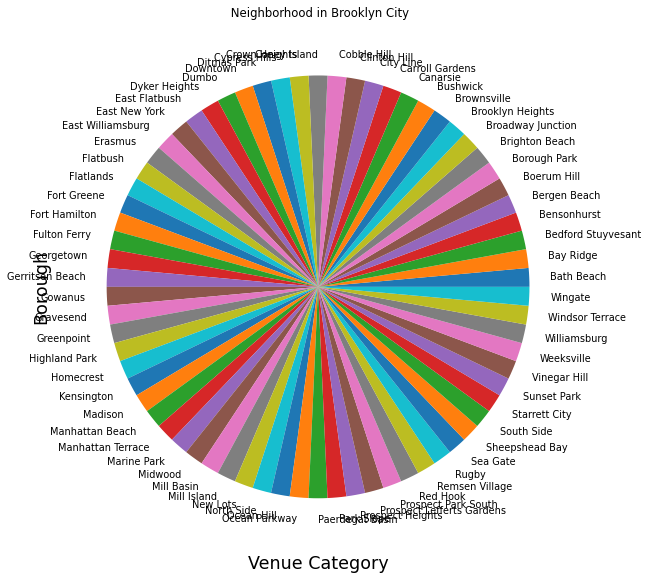

In [109]:
plt.figure(figsize=(14,10), dpi = 70)
plt.title(' Neighborhood in Brooklyn City')
#x-axis
plt.xlabel('Venue Category', fontsize = 18)
#y-axis
plt.ylabel('Neighborhood', fontsize = 18)
brooklyn_merged.groupby('Neighborhood')['Borough'].count().plot(kind='pie').alpha=0.75


In [110]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Bronx

In [111]:
# one hot encoding
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]

bronx_onehot.head()

Neighborhood  Accessories Store  African Restaurant  American Restaurant  \
0    Wakefield                  0                   0                    0   
1    Wakefield                  0                   0                    0   
2    Wakefield                  0                   0                    0   
3    Wakefield                  0                   0                    0   
4    Wakefield                  0                   0                    0   

   Arcade  Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0       0                 0            0           0                    0   
1       0                 0            0           0                    0   
2       0                 0            0           0                    0   
3       0                 0            0           0                    0   
4       0                 0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0                 0                   0                0          0   
1                 0                   0                0          0   
2                 0                   0                0          0   
3                 0                   0                0          0   
4                 0                   0                0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Beach  Beer Bar  Board Shop  Boat or Ferry  Bookstore  \
0                 0      0         0           0              0          0   
1                 0      0         0           0              0          0   
2                 0      0         0           0              0          0   
3                 0      0         0           0              0          0   
4                 0      0         0           0              0          0   

   Bowling Alley  Breakfast Spot  Brewery  Buffet  Building  Burger Joint  \
0              0               0        0       0         0             0   
1              0               0        0       0         0             0   
2              0               0        0       0         0             0   
3              0               0        0       0         0             0   
4              0               0        0       0         0             0   

   Burrito Place  Bus Line  Bus Station  Bus Stop  Café  Candy Store  \
0              0         0            0         0     0            0   
1              0         0            0         0     0            0   
2              0         0            0         0     0            0   
3              0         0            0         0     0            0   
4              0         0            0         0     0            0   

   Caribbean Restaurant  Check Cashing Service  Cheese Shop  \
0                     0                      0            0   
1                     0                      0            0   
2                     0                      0            0   
3                     0                      0            0   
4                     0                      0            0   

   Chinese Restaurant  Clothing Store  Coffee Shop  Comfort Food Restaurant  \
0                   0               0            0                        0   
1                   0               0            0                        0   
2                   0               0            0                        0   
3                   0               0            0                        0   
4                   0               0            0                        0   

   

In [112]:
bronx_onehot.shape

(1304, 187)

In [113]:
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
bronx_grouped

Neighborhood  Accessories Store  African Restaurant  \
0              Allerton           0.000000            0.000000   
1            Baychester           0.000000            0.000000   
2          Bedford Park           0.000000            0.000000   
3               Belmont           0.000000            0.000000   
4             Bronxdale           0.000000            0.000000   
5           Castle Hill           0.000000            0.000000   
6           City Island           0.000000            0.000000   
7     Claremont Village           0.000000            0.000000   
8          Clason Point           0.000000            0.000000   
9            Co-op City           0.058824            0.000000   
10            Concourse           0.000000            0.000000   
11    Concourse Village           0.024390            0.024390   
12         Country Club           0.000000            0.000000   
13         East Tremont           0.000000            0.000000   
14          Eastchester           0.000000            0.000000   
15             Edenwald           0.000000            0.000000   
16       Edgewater Park           0.000000            0.000000   
17            Fieldston           0.000000            0.000000   
18              Fordham           0.011236            0.011236   
19         High  Bridge           0.000000            0.000000   
20          Hunts Point           0.000000            0.000000   
21          Kingsbridge           0.000000            0.000000   
22  Kingsbridge Heights           0.000000            0.027778   
23             Longwood           0.000000            0.000000   
24              Melrose           0.037037            0.000000   
25       Morris Heights           0.000000            0.000000   
26          Morris Park           0.000000            0.000000   
27           Morrisania           0.000000            0.000000   
28           Mott Haven           0.000000            0.000000   
29           Mount Eden           0.000000            0.000000   
30           Mount Hope           0.000000            0.000000   
31      North Riverdale           0.000000            0.000000   
32              Norwood           0.000000            0.000000   
33            Olinville           0.000000            0.000000   
34          Parkchester           0.000000            0.000000   
35           Pelham Bay           0.000000            0.000000   
36       Pelham Gardens           0.000000            0.000000   
37       Pelham Parkway           0.000000            0.000000   
38          Port Morris           0.000000            0.000000   
39            Riverdale           0.000000            0.000000   
40        Schuylerville           0.000000            0.000000   
41            Soundview           0.000000            0.000000   
42       Spuyten Duyvil           0.000000            0.000000   
43          Throgs Neck           0.000000            0.000000   
44            Unionport           0.000000            0.000000   
45   University Heights           0.000000            0.041667   
46             Van Nest           0.000000            0.000000   
47            Wakefield           0.000000            0.000000   
48           West Farms           0.000000            0.000000   
49   Westchester Square           0.000000            0.000000   
50       Williamsbridge           0.000000            0.000000   
51             Woodlawn           0.000000            0.000000   

    American Restaurant    Arcade  Arepa Restaurant  Art Gallery  Art Museum  \
0              0.000000  0.000000          0.000000     0.029412    0.000000   
1              0.000000  0.047619          0.000000     0.000000    0.000000   
2              0.000000  0.000000          0.000000     0.000000    0.000000   
3              0.010204  0.000000          0.000000     0.000000    0.000000   
4              0.000000  0.000000          0.000000     0.000000    0.000000   
5              0.000000  0.00000

In [114]:
bronx_grouped.shape

(52, 187)

In [115]:
num_top_venues = 5

for hood in bronx_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bronx_grouped[bronx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                venue  freq
0         Pizza Place  0.12
1  Chinese Restaurant  0.09
2                 Spa  0.06
3          Playground  0.06
4       Deli / Bodega  0.06


----Baychester----
                venue  freq
0          Donut Shop  0.10
1      Discount Store  0.05
2         Men's Store  0.05
3  Spanish Restaurant  0.05
4   Food & Drink Shop  0.05


----Bedford Park----
                venue  freq
0               Diner  0.11
1       Deli / Bodega  0.08
2  Chinese Restaurant  0.08
3         Pizza Place  0.08
4  Mexican Restaurant  0.08


----Belmont----
                venue  freq
0  Italian Restaurant  0.18
1         Pizza Place  0.09
2       Deli / Bodega  0.07
3              Bakery  0.05
4        Dessert Shop  0.03


----Bronxdale----
                         venue  freq
0                Deli / Bodega  0.07
1                         Bank  0.07
2  Eastern European Restaurant  0.07
3            Convenience Store  0.07
4                  Coffee Shop  0.07


----C

In [116]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [117]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0      Allerton           Pizza Place    Chinese Restaurant   
1    Baychester            Donut Shop                  Bank   
2  Bedford Park                 Diner           Pizza Place   
3       Belmont    Italian Restaurant           Pizza Place   
4     Bronxdale    Spanish Restaurant                  Bank   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0         Deli / Bodega           Supermarket                   Spa   
1    Mexican Restaurant  Fast Food Restaurant           Men's Store   
2    Chinese Restaurant    Mexican Restaurant         Deli / Bodega   
3         Deli / Bodega                Bakery            Donut Shop   
4           Pizza Place     Convenience Store           Coffee Shop   

   6th Most Common Venue 7th Most Common Venue          8th Most Common Venue  \
0             Playground          Intersection                    Gas Station   
1            Pizza Place    Spanish Restaurant              Food & Drink Shop   
2               Pharmacy    Spanish Restaurant                 Sandwich Place   
3           Dessert Shop                  Bank                 Sandwich Place   
4  Performing Arts Venue    Chinese Restaurant  Paper / Office Supplies Store   

         9th Most Common Venue 10th Most Common Venue  
0           Spanish Restaurant             Donut Shop  
1               Mattress Store            Supermarket  
2                  Supermarket      Convenience Store  
3           Mexican Restaurant                   Café  
4  Eastern European Restaurant         Breakfast Spot

In [118]:
# set number of clusters
kclusters = 5

bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 0, 3, 0, 0, 3, 3, 3, 3], dtype=int32)

In [119]:
## add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bronx_merged = bronx_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
bronx_merged = bronx_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bronx_merged.head() # check the last columns!

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201               3   
1   Bronx   Co-op City  40.874294 -73.829939               3   
2   Bronx  Eastchester  40.887556 -73.827806               2   
3   Bronx    Fieldston  40.895437 -73.905643               1   
4   Bronx    Riverdale  40.890834 -73.912585               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0              Pharmacy        Ice Cream Shop           Gas Station   
1           Bus Station     Accessories Store            Bagel Shop   
2  Caribbean Restaurant           Bus Station         Metro Station   
3                 Plaza                 River  Medical Supply Store   
4                  Park            Playground                 Plaza   

  4th Most Common Venue        5th Most Common Venue 6th Most Common Venue  \
0            Donut Shop                   Laundromat        Sandwich Place   
1           Post Office                     Pharmacy                  Park   
2         Deli / Bodega                        Diner        Cosmetics Shop   
3         Women's Store  Eastern European Restaurant           Flower Shop   
4          Home Service                   Food Truck         Moving Target   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  Caribbean Restaurant         Deli / Bodega          Dessert Shop   
1        Discount Store            Restaurant    Chinese Restaurant   
2     Convenience Store            Donut Shop    Chinese Restaurant   
3           Flea Market           Fish Market     Fish & Chips Shop   
4                   Gym        Farmers Market           Bus Station   

  10th Most Common Venue  
0      Electronics Store  
1   Fast Food Restaurant  
2     Seafood Restaurant  
3   Fast Food Restaurant  
4                   Bank

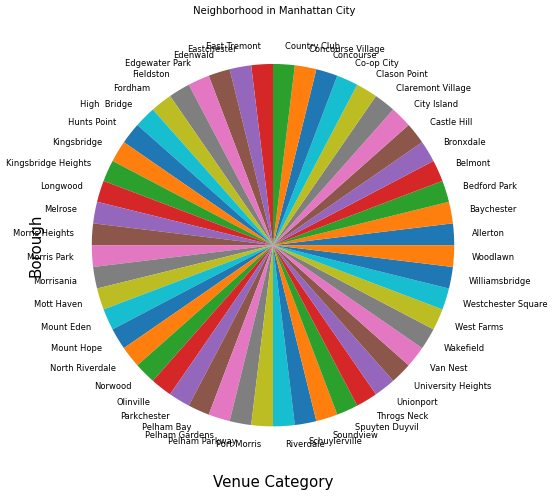

In [120]:
plt.figure(figsize=(14,10), dpi = 60)
plt.title(' Neighborhood in Manhattan City')
#x-axis
plt.xlabel('Venue Category', fontsize = 18)
#y-axis
plt.ylabel('Venue Category', fontsize = 18)
bronx_merged.groupby('Neighborhood')['Borough'].count().plot(kind='pie').alpha=0.75


In [121]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Staten Island

In [122]:
# one hot encoding
staten_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
staten_onehot['Neighborhood'] = staten_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [staten_onehot.columns[-1]] + list(staten_onehot.columns[:-1])
staten_onehot = staten_onehot[fixed_columns]

staten_onehot.head()

Neighborhood  Accessories Store  African Restaurant  American Restaurant  \
0   St. George                  0                   0                    0   
1   St. George                  0                   0                    0   
2   St. George                  0                   0                    0   
3   St. George                  0                   0                    0   
4   St. George                  0                   0                    0   

   Arcade  Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0       0                 0            0           0                    0   
1       0                 0            0           0                    0   
2       0                 0            0           0                    0   
3       0                 0            0           0                    0   
4       0                 0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0                 0                   0                0          0   
1                 0                   0                0          0   
2                 0                   0                0          0   
3                 0                   0                0          0   
4                 0                   0                0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Beach  Beer Bar  Board Shop  Boat or Ferry  Bookstore  \
0                 0      0         0           0              0          0   
1                 0      0         0           0              0          0   
2                 0      0         0           0              0          0   
3                 0      0         0           0              0          0   
4                 0      0         0           0              0          0   

   Bowling Alley  Breakfast Spot  Brewery  Buffet  Building  Burger Joint  \
0              0               0        0       0         0             0   
1              0               0        0       0         0             0   
2              0               0        0       0         0             0   
3              0               0        0       0         0             0   
4              0               0        0       0         0             0   

   Burrito Place  Bus Line  Bus Station  Bus Stop  Café  Candy Store  \
0              0         0            0         0     0            0   
1              0         0            0         0     0            0   
2              0         0            0         0     0            0   
3              0         0            0         0     0            0   
4              0         0            0         0     0            0   

   Caribbean Restaurant  Check Cashing Service  Cheese Shop  \
0                     0                      0            0   
1                     0                      0            0   
2                     0                      0            0   
3                     0                      0            0   
4                     0                      0            0   

   Chinese Restaurant  Clothing Store  Coffee Shop  Comfort Food Restaurant  \
0                   0               0            0                        0   
1                   0               0            0                        0   
2                   0               0            0                        0   
3                   0               0            0                        0   
4                   0               0            0                        0   

   

In [123]:
staten_onehot.shape

(1304, 187)

In [124]:
staten_grouped = staten_onehot.groupby('Neighborhood').mean().reset_index()
staten_grouped

Neighborhood  Accessories Store  African Restaurant  \
0            Annadale           0.000000            0.083333   
1       Arden Heights           0.000000            0.000000   
2           Arlington           0.000000            0.000000   
3            Arrochar           0.000000            0.000000   
4         Bay Terrace           0.000000            0.000000   
5          Bloomfield           0.000000            0.000000   
6          Bulls Head           0.000000            0.000000   
7        Butler Manor           0.000000            0.000000   
8   Castleton Corners           0.000000            0.000000   
9          Charleston           0.000000            0.000000   
10            Chelsea           0.000000            0.000000   
11            Clifton           0.000000            0.000000   
12            Concord           0.000000            0.000000   
13       Dongan Hills           0.000000            0.000000   
14        Egbertville           0.000000            0.000000   
15           Elm Park           0.000000            0.000000   
16        Eltingville           0.000000            0.000000   
17       Emerson Hill           0.000000            0.000000   
18          Fox Hills           0.000000            0.000000   
19       Graniteville           0.000000            0.000000   
20         Grant City           0.045455            0.000000   
21           Grasmere           0.000000            0.000000   
22        Great Kills           0.000000            0.000000   
23         Greenridge           0.000000            0.000000   
24        Grymes Hill           0.000000            0.000000   
25  Heartland Village           0.000000            0.000000   
26       Howland Hook           0.000000            0.000000   
27           Huguenot           0.000000            0.000000   
28    Lighthouse Hill           0.000000            0.000000   
29      Manor Heights           0.000000            0.000000   
30   Mariner's Harbor           0.000000            0.000000   
31      Midland Beach           0.000000            0.000000   
32       New Brighton           0.000000            0.000000   
33           New Dorp           0.000000            0.000000   
34     New Dorp Beach           0.000000            0.000000   
35    New Springville           0.000000            0.000000   
36            Oakwood           0.000000            0.000000   
37           Old Town           0.000000            0.000000   
38          Park Hill           0.142857            0.000000   
39    Pleasant Plains           0.000000            0.000000   
40         Port Ivory           0.000000            0.000000   
41      Port Richmond           0.000000            0.000000   
42       Prince's Bay           0.000000            0.000000   
43      Randall Manor           0.000000            0.000000   
44      Richmond Town           0.000000            0.000000   
45    Richmond Valley           0.000000            0.000000   
46           Rosebank           0.000000            0.000000   
47          Rossville           0.000000            0.000000   
48       Sandy Ground           0.000000            0.000000   
49        Shore Acres           0.000000            0.000000   
50        Silver Lake           0.000000            0.000000   
51        South Beach           0.000000            0.000000   
52         St. George           0.028571            0.000000   
53          Stapleton           0.000000            0.000000   
54          Sunnyside           0.000000            0.000000   
55          Todt Hill           0.000000            0.000000   
56      Tompkinsville           0.000000            0.041667   
57        Tottenville           0.000000            0.000000   
58             Travis           0.000000            0.000000   
59      West Brighton           0.000000            0.000000   
60        Westerleigh           0.000000            0.000000   
61        Willowbrook           0.000000 

In [125]:
staten_grouped.shape

(63, 187)

In [126]:
num_top_venues = 5

for hood in staten_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = staten_grouped[staten_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Annadale----
                venue  freq
0       Deli / Bodega  0.08
1   Convenience Store  0.08
2          Food Truck  0.08
3       Grocery Store  0.08
4  Mexican Restaurant  0.08


----Arden Heights----
               venue  freq
0               Park  0.33
1               Pool  0.33
2      Grocery Store  0.17
3           Bus Stop  0.17
4  Accessories Store  0.00


----Arlington----
               venue  freq
0  Mobile Phone Shop  0.14
1       Outlet Store  0.14
2           Pharmacy  0.14
3   Greek Restaurant  0.14
4  Electronics Store  0.14


----Arrochar----
                  venue  freq
0  Fast Food Restaurant  0.08
1            Donut Shop  0.08
2  Gym / Fitness Center  0.08
3        Clothing Store  0.08
4         Deli / Bodega  0.08


----Bay Terrace----
               venue  freq
0         Distillery  0.08
1  Fish & Chips Shop  0.08
2            Brewery  0.08
3          Bookstore  0.08
4      Boat or Ferry  0.08


----Bloomfield----
                 venue  freq
0  American Re

In [127]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [128]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = staten_grouped['Neighborhood']

for ind in np.arange(staten_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Annadale    Spanish Restaurant            Donut Shop   
1  Arden Heights                  Pool                  Park   
2      Arlington   Sporting Goods Shop              Pharmacy   
3       Arrochar        Clothing Store         Deli / Bodega   
4    Bay Terrace    Spanish Restaurant               Brewery   

  3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
0    Mexican Restaurant         Deli / Bodega               Baseball Field   
1         Grocery Store              Bus Stop  Eastern European Restaurant   
2     Mobile Phone Shop  Fast Food Restaurant                 Outlet Store   
3  Fast Food Restaurant  Gym / Fitness Center                   Donut Shop   
4     Fish & Chips Shop             Bookstore                Boat or Ferry   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Grocery Store                Bakery            Food Truck   
1           Flower Shop           Flea Market           Fish Market   
2     Electronics Store      Greek Restaurant        Discount Store   
3          Dance Studio     Mobile Phone Shop            Shoe Store   
4            Distillery           Flower Shop   Peruvian Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0    African Restaurant            Wings Joint  
1     Fish & Chips Shop   Fast Food Restaurant  
2                  Farm          Deli / Bodega  
3           Pizza Place     Spanish Restaurant  
4                Bakery     Chinese Restaurant

In [129]:
# set number of clusters
kclusters = 5

staten_grouped_clustering = staten_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(staten_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [130]:
## add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

staten_merged = staten_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
staten_merged = staten_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

staten_merged.head() # check the last columns!

Borough   Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Staten Island     St. George  40.644982 -74.079353               1   
1  Staten Island   New Brighton  40.640615 -74.087017               1   
2  Staten Island      Stapleton  40.626928 -74.077902               1   
3  Staten Island       Rosebank  40.615305 -74.069805               1   
4  Staten Island  West Brighton  40.631879 -74.107182               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  Caribbean Restaurant              Pharmacy           Bus Station   
1  Caribbean Restaurant           Bus Station    Chinese Restaurant   
2                  Park           Pizza Place            Playground   
3                Bakery                   Bar        Sandwich Place   
4                   Bar           Pizza Place   Fried Chicken Joint   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0         Deli / Bodega            Donut Shop           Pizza Place   
1         Metro Station  Fast Food Restaurant     Food & Drink Shop   
2                 Plaza           Bus Station  Caribbean Restaurant   
3    Spanish Restaurant    Mexican Restaurant           Pizza Place   
4              Pharmacy        Sandwich Place          Liquor Store   

       7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0         Seafood Restaurant        Sandwich Place            Restaurant   
1            Automotive Shop         Deli / Bodega                 Diner   
2              Metro Station          Burger Joint    Mexican Restaurant   
3                Wings Joint           Candy Store        Breakfast Spot   
4  Latin American Restaurant                   Pub            Donut Shop   

  10th Most Common Venue  
0     Chinese Restaurant  
1                Dog Run  
2               Bus Stop  
3     Seafood Restaurant  
4     Chinese Restaurant

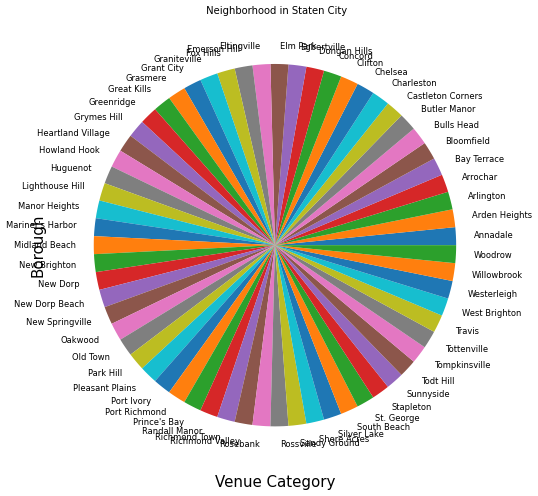

In [131]:
plt.figure(figsize=(14,10), dpi = 60)
plt.title(' Neighborhood in Staten City')
#x-axis
plt.xlabel('Venue Category', fontsize = 18)
#y-axis
plt.ylabel('Venue Category', fontsize = 18)
staten_merged.groupby('Neighborhood')['Borough'].count().plot(kind='pie').alpha=0.75


In [132]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(staten_merged['Latitude'], staten_merged['Longitude'],staten_merged['Neighborhood'], staten_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Queens

In [133]:
# one hot encoding
queens_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
queens_onehot['Neighborhood'] = queens_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [queens_onehot.columns[-1]] + list(queens_onehot.columns[:-1])
queens_onehot = queens_onehot[fixed_columns]

queens_onehot.head()

Neighborhood  Accessories Store  African Restaurant  American Restaurant  \
0      Astoria                  0                   0                    0   
1      Astoria                  0                   0                    0   
2      Astoria                  0                   0                    0   
3      Astoria                  0                   0                    0   
4      Astoria                  0                   0                    0   

   Arcade  Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0       0                 0            0           0                    0   
1       0                 0            0           0                    0   
2       0                 0            0           0                    0   
3       0                 0            0           0                    0   
4       0                 0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0                 0                   0                0          0   
1                 0                   0                0          0   
2                 0                   0                0          0   
3                 0                   0                0          0   
4                 0                   0                0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Beach  Beer Bar  Board Shop  Boat or Ferry  Bookstore  \
0                 0      0         0           0              0          0   
1                 0      0         0           0              0          0   
2                 0      0         0           0              0          0   
3                 0      0         0           0              0          0   
4                 0      0         0           0              0          0   

   Bowling Alley  Breakfast Spot  Brewery  Buffet  Building  Burger Joint  \
0              0               0        0       0         0             0   
1              0               0        0       0         0             0   
2              0               0        0       0         0             0   
3              0               0        0       0         0             0   
4              0               0        0       0         0             0   

   Burrito Place  Bus Line  Bus Station  Bus Stop  Café  Candy Store  \
0              0         0            0         0     0            0   
1              0         0            0         0     0            0   
2              0         0            0         0     0            0   
3              0         0            0         0     0            0   
4              0         0            0         0     0            0   

   Caribbean Restaurant  Check Cashing Service  Cheese Shop  \
0                     0                      0            0   
1                     0                      0            0   
2                     0                      0            0   
3                     0                      0            0   
4                     0                      0            0   

   Chinese Restaurant  Clothing Store  Coffee Shop  Comfort Food Restaurant  \
0                   0               0            0                        0   
1                   0               0            0                        0   
2                   0               0            0                        0   
3                   0               0            0                        0   
4                   0               0            0                        0   

   

In [134]:
queens_onehot.shape

(1304, 187)

In [135]:
queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()
queens_grouped

Neighborhood  Accessories Store  African Restaurant  \
0             Astoria           0.010000            0.000000   
1          Auburndale           0.000000            0.000000   
2             Bayside           0.000000            0.000000   
3           Bellerose           0.000000            0.000000   
4           Briarwood           0.000000            0.083333   
5       College Point           0.000000            0.000000   
6              Corona           0.000000            0.000000   
7          Douglaston           0.000000            0.000000   
8       East Elmhurst           0.000000            0.000000   
9            Elmhurst           0.000000            0.000000   
10           Flushing           0.000000            0.000000   
11       Forest Hills           0.000000            0.025000   
12      Fresh Meadows           0.000000            0.000000   
13          Glen Oaks           0.000000            0.000000   
14           Glendale           0.000000            0.000000   
15             Hollis           0.000000            0.000000   
16       Howard Beach           0.000000            0.027027   
17    Jackson Heights           0.000000            0.000000   
18     Jamaica Center           0.022727            0.000000   
19        Kew Gardens           0.020000            0.000000   
20  Kew Gardens Hills           0.000000            0.000000   
21        Little Neck           0.000000            0.000000   
22   Long Island City           0.013889            0.000000   
23            Maspeth           0.000000            0.000000   
24    Oakland Gardens           0.000000            0.000000   
25         Ozone Park           0.000000            0.000000   
26     Queens Village           0.000000            0.000000   
27          Rego Park           0.000000            0.000000   
28      Richmond Hill           0.000000            0.000000   
29          Ridgewood           0.000000            0.000000   
30      South Jamaica           0.000000            0.000000   
31   South Ozone Park           0.000000            0.000000   
32         St. Albans           0.000000            0.050000   
33          Sunnyside           0.000000            0.000000   
34         Whitestone           0.000000            0.000000   
35          Woodhaven           0.000000            0.000000   
36           Woodside           0.000000            0.000000   

    American Restaurant    Arcade  Arepa Restaurant  Art Gallery  Art Museum  \
0              0.000000  0.000000              0.00     0.000000    0.000000   
1              0.050000  0.000000              0.00     0.000000    0.000000   
2              0.013889  0.000000              0.00     0.000000    0.000000   
3              0.000000  0.000000              0.00     0.000000    0.000000   
4              0.000000  0.000000              0.00     0.000000    0.000000   
5              0.000000  0.000000              0.00     0.000000    0.000000   
6              0.000000  0.000000              0.00     0.000000    0.000000   
7              0.000000  0.000000              0.00     0.000000    0.037037   
8              0.000000  0.000000              0.00     0.000000    0.000000   
9              0.027778  0.000000              0.00     0.000000    0.000000   
10             0.000000  0.000000              0.00     0.016129    0.000000   
11             0.000000  0.000000              0.00     0.000000    0.000000   
12             0.000000  0.000000              0.00     0.000000    0.000000   
13             0.045455  0.000000              0.00     0.045455    0.000000   
14             0.000000  0.000000              0.00     0.000000    0.000000   
15             0.000000  0.000000              0.00     0.055556    0.000000   
16             0.000000  0.000000              0.00     0.000000    0.000000   
17             0.012195  0.012195              0.00     0.000000    0.000000   
18             0.000000  0.000000              0.00     

In [136]:
queens_grouped.shape

(37, 187)

In [137]:
num_top_venues = 5

for hood in queens_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = queens_grouped[queens_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Astoria----
                  venue  freq
0  Caribbean Restaurant  0.06
1           Bus Station  0.06
2           Pizza Place  0.05
3                  Park  0.04
4            Donut Shop  0.03


----Auburndale----
                venue  freq
0         Pizza Place  0.20
1  Italian Restaurant  0.10
2                 Pub  0.05
3   Convenience Store  0.05
4          Sports Bar  0.05


----Bayside----
                venue  freq
0  Italian Restaurant  0.07
1                Bank  0.07
2          Donut Shop  0.06
3  Mexican Restaurant  0.06
4      Sandwich Place  0.04


----Bellerose----
                  venue  freq
0         Grocery Store  0.19
1           Pizza Place  0.10
2    Chinese Restaurant  0.10
3  Caribbean Restaurant  0.10
4         Deli / Bodega  0.05


----Briarwood----
                  venue  freq
0  Fast Food Restaurant  0.17
1         Women's Store  0.08
2                Buffet  0.08
3             Juice Bar  0.08
4        Cosmetics Shop  0.08


----College Point----
     

In [138]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [139]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = queens_grouped['Neighborhood']

for ind in np.arange(queens_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(queens_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0      Astoria           Bus Station  Caribbean Restaurant   
1   Auburndale           Pizza Place    Italian Restaurant   
2      Bayside    Italian Restaurant                  Bank   
3    Bellerose         Grocery Store  Caribbean Restaurant   
4    Briarwood  Fast Food Restaurant         Women's Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place                  Park            Donut Shop   
1                  Bank              Pharmacy                   Pub   
2            Donut Shop    Mexican Restaurant                 Diner   
3           Pizza Place    Chinese Restaurant           Supermarket   
4                Buffet        Cosmetics Shop     Convenience Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Mexican Restaurant                 Diner         Deli / Bodega   
1           Coffee Shop                  Park        Sandwich Place   
2        Sandwich Place           Pizza Place    Chinese Restaurant   
3        Shop & Service     Mobile Phone Shop             Gift Shop   
4        Discount Store             Pet Store           Bus Station   

  9th Most Common Venue 10th Most Common Venue  
0              Pharmacy                  Plaza  
1  Fast Food Restaurant          Deli / Bodega  
2           Coffee Shop            Bus Station  
3        Discount Store          Deli / Bodega  
4                 Plaza     African Restaurant

In [140]:
# set number of clusters
kclusters = 5

queens_grouped_clustering = queens_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(queens_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [141]:
## add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

queens_merged = queens_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
queens_merged = queens_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

queens_merged.head() # check the last columns!

Borough     Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Queens          Astoria  40.768509 -73.915654             1.0   
1  Queens         Woodside  40.746349 -73.901842             0.0   
2  Queens  Jackson Heights  40.751981 -73.882821             1.0   
3  Queens         Elmhurst  40.744049 -73.881656             0.0   
4  Queens     Howard Beach  40.654225 -73.838138             1.0   

  1st Most Common Venue 2nd Most Common Venue   3rd Most Common Venue  \
0           Bus Station  Caribbean Restaurant             Pizza Place   
1           Pizza Place                   Bar                     Pub   
2           Pizza Place                  Bank      Chinese Restaurant   
3                 Diner                  Park  Thrift / Vintage Store   
4           Pizza Place         Deli / Bodega      Chinese Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                  Park            Donut Shop    Mexican Restaurant   
1         Deli / Bodega            Playground                  Park   
2         Deli / Bodega           Bus Station        Sandwich Place   
3           Pizza Place         Boat or Ferry    Seafood Restaurant   
4    Mexican Restaurant                 Diner            Donut Shop   

  7th Most Common Venue      8th Most Common Venue 9th Most Common Venue  \
0                 Diner              Deli / Bodega              Pharmacy   
1        Sandwich Place  Latin American Restaurant            Donut Shop   
2    Italian Restaurant                 Donut Shop     Convenience Store   
3        History Museum             Baseball Field                 Beach   
4        Sandwich Place                   Pharmacy    Spanish Restaurant   

  10th Most Common Venue  
0                  Plaza  
1          Grocery Store  
2             Restaurant  
3     Spanish Restaurant  
4            Supermarket

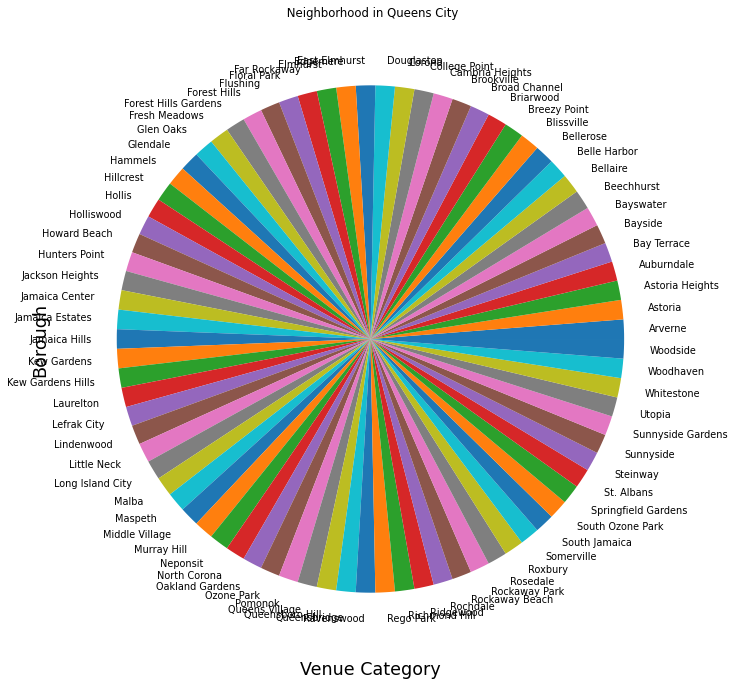

In [143]:
plt.figure(figsize=(22,12), dpi = 70)
plt.title(' Neighborhood in Queens City')
#x-axis
plt.xlabel('Venue Category', fontsize = 18)
#y-axis
plt.ylabel('Venue Category', fontsize = 18)
queens_merged.groupby('Neighborhood')['Borough'].count().plot(kind='pie').alpha=0.75


In [144]:
# create map of Manhattan using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queens_merged['Latitude'], queens_merged['Longitude'], queens_merged['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

## Examine Clusters

### Manhattan

### Cluster1

In [145]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
2   Washington Heights                  Café                Bakery   
4     Hamilton Heights           Pizza Place           Coffee Shop   
9            Yorkville    Italian Restaurant           Coffee Shop   
10          Lenox Hill    Italian Restaurant      Sushi Restaurant   
12     Upper West Side    Italian Restaurant                  Café   
13      Lincoln Square                 Plaza                  Café   
18   Greenwich Village    Italian Restaurant      Sushi Restaurant   
19        East Village                   Bar        Ice Cream Shop   
21             Tribeca   American Restaurant                  Park   
22        Little Italy                  Café                Bakery   
23                Soho        Clothing Store    Italian Restaurant   
24        West Village    Italian Restaurant   American Restaurant   
27            Gramercy                   Bar    Italian Restaurant   
31                Noho    Italian Restaurant                 Hotel   

      3rd Most Common Venue      4th Most Common Venue  \
2             Grocery Store  Latin American Restaurant   
4                      Café         Mexican Restaurant   
9                       Gym                        Bar   
10              Pizza Place                Coffee Shop   
12                      Bar          Indian Restaurant   
13             Concert Hall      Performing Arts Venue   
18           Clothing Store                       Café   
19       Mexican Restaurant                Pizza Place   
21                 Wine Bar         Italian Restaurant   
22       Italian Restaurant            Bubble Tea Shop   
23              Coffee Shop                   Boutique   
24  New American Restaurant                   Wine Bar   
27               Bagel Shop            Thai Restaurant   
31       Mexican Restaurant                Yoga Studio   

       5th Most Common Venue    6th Most Common Venue  \
2              Deli / Bodega  New American Restaurant   
4               Cocktail Bar        Indian Restaurant   
9              Deli / Bodega         Sushi Restaurant   
10              Cocktail Bar                      Gym   
12                  Wine Bar              Pizza Place   
13                   Theater       Italian Restaurant   
18         Indian Restaurant      American Restaurant   
19                  Wine Bar        Korean Restaurant   
21                      Café         Greek Restaurant   
22        Chinese Restaurant             Cocktail Bar   
23  Mediterranean Restaurant               Shoe Store   
24              Cocktail Bar                     Park   
27       American Restaurant              Pizza Place   
31               Pizza Place              Coffee Shop   

       7th Most Common Venue 8th Most Common Venue  \
2                 Donut Shop     Mobile Phone Shop   
4               Liquor Store      Sushi Restaurant   
9        Japanese Restaurant             Wine Shop   
10      Gym / Fitness Center                  Café   
12                    Bakery           Coffee Shop   
13      Gym / Fitness Center     French Restaurant   
18                       Gym              Boutique   
19                 Speakeasy    Italian Restaurant   
21                       Spa           Coffee Shop   
22  Mediterranean Restaurant        Ice Cream Shop   
23                    Bakery                  Café   
24                   Theater             Jazz Club   
27               Coffee Shop        Ice Cream Shop   
31              Cocktail Bar             Bookstore   

            9th Most Common Venue  10th Most Common Venue  
2              Chinese Restaurant          Sandwich Place  
4                            Park           Deli / Bodega  
9                           Diner      Mexican Restaurant  
10                   Burger Joint      Salon / Barbershop  
12  Vegetarian / Vegan Restaurant         Thai Restaurant  
13            Indie Movie Theater               Wine Shop  
1

### Cluster 2

In [146]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1            Chinatown    Chinese Restaurant          Cocktail Bar   
6       Central Harlem    African Restaurant                   Bar   
8      Upper East Side               Exhibit    Italian Restaurant   
11    Roosevelt Island            Playground         Deli / Bodega   
14             Clinton               Theater   American Restaurant   
15             Midtown                 Hotel           Coffee Shop   
16         Murray Hill   Japanese Restaurant           Coffee Shop   
17             Chelsea           Coffee Shop           Art Gallery   
20     Lower East Side    Chinese Restaurant   Japanese Restaurant   
25    Manhattan Valley                   Bar           Coffee Shop   
28   Battery Park City                  Park                 Hotel   
29  Financial District           Coffee Shop           Pizza Place   
30       Carnegie Hill           Coffee Shop                  Café   
32        Civic Center           Coffee Shop  Gym / Fitness Center   
33       Midtown South     Korean Restaurant                 Hotel   
34        Sutton Place    Italian Restaurant  Gym / Fitness Center   
35          Turtle Bay           Coffee Shop    Italian Restaurant   
38            Flatiron    Italian Restaurant   Japanese Restaurant   
39        Hudson Yards                 Hotel    Italian Restaurant   

      3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1              Dessert Shop                Bakery   American Restaurant   
6         French Restaurant   American Restaurant    Chinese Restaurant   
8               Coffee Shop                Bakery  Gym / Fitness Center   
11                   School      Greek Restaurant           Supermarket   
14     Gym / Fitness Center           Coffee Shop          Cocktail Bar   
15                   Bakery        Clothing Store               Theater   
16                    Hotel  Gym / Fitness Center        Sandwich Place   
17                   Bakery   American Restaurant        Ice Cream Shop   
20         Ramen Restaurant           Pizza Place           Art Gallery   
25              Yoga Studio           Pizza Place            Playground   
28                      Gym           Coffee Shop         Memorial Site   
29             Cocktail Bar                  Café                   Bar   
30                Bookstore    Italian Restaurant  Gym / Fitness Center   
32                      Spa          Cocktail Bar                 Hotel   
33      Japanese Restaurant        Cosmetics Shop          Burger Joint   
34   Furniture / Home Store           Pizza Place           Coffee Shop   
35         Sushi Restaurant   Japanese Restaurant                  Park   
38  New American Restaurant          Cycle Studio                   Gym   
39     Gym / Fitness Center   American Restaurant           Coffee Shop   

   6th Most Common Venue     7th Most Common Venue 8th Most Common Venue  \
1     Salon / Barbershop                       Spa          Noodle House   
6     Seafood Restaurant            Cosmetics Shop             Cafeteria   
8            Yoga Studio            Cosmetics Shop     French Restaurant   
11       Bubble Tea Shop               Pizza Place     Food & Drink Shop   
14        Sandwich Place                       Gym                 Hotel   
15            Steakhouse       Sporting Goods Shop      Sushi Restaurant   
16   American Restaurant                       Bar            Restaurant   
17    Italian Restaurant       Japanese Restaurant                  Park   
20              Pharmacy                    Bakery                  Café   
25       Thai Restaurant        Mexican Restaurant        Cosmetics Shop   
28         Shopping Mall                     Plaza          Burger Joint   
29                   Gym                 Juice Bar                  Park   
30                   Gym         French Restaurant           Yoga Studio   
32     French Restaurant               Yoga 

### Cluster 3

In [147]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
37  Stuyvesant Town                  Park           Pet Service   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
37  Gym / Fitness Center       Harbor / Marina           Coffee Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
37        Baseball Field                   Bar                Bistro   

   9th Most Common Venue 10th Most Common Venue  
37              Heliport         Farmers Market

### Cluster 4

In [148]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
3                Inwood    Mexican Restaurant                Lounge   
5        Manhattanville    Seafood Restaurant           Coffee Shop   
7           East Harlem    Mexican Restaurant                Bakery   
26  Morningside Heights                  Park   American Restaurant   
36           Tudor City                  Café                  Park   

   3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
3             Restaurant                  Café         Frozen Yogurt Shop   
5                    Bar         Deli / Bodega         Italian Restaurant   
7        Thai Restaurant         Deli / Bodega  Latin American Restaurant   
26           Coffee Shop             Bookstore               Burger Joint   
36    Mexican Restaurant      Asian Restaurant                      Diner   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3          Deli / Bodega           Pizza Place              Wine Bar   
5                   Park    Mexican Restaurant    Spanish Restaurant   
7         Sandwich Place     French Restaurant          Cocktail Bar   
26                  Café         Deli / Bodega                   Pub   
36         Deli / Bodega           Coffee Shop      Sushi Restaurant   

            9th Most Common Venue 10th Most Common Venue  
3            Caribbean Restaurant                   Park  
5                       Gastropub                 Lounge  
7                        Beer Bar          Grocery Store  
26  Paper / Office Supplies Store     Seafood Restaurant  
36                            Gym                Dog Run

### Cluster 5

In [149]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Marble Hill                   Gym        Discount Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop        Sandwich Place           Yoga Studio   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Pizza Place         Deli / Bodega      Department Store   

  9th Most Common Venue 10th Most Common Venue  
0              Pharmacy                  Diner

### Brooklyn

### Cluster 1

In [150]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
28         Canarsie  Caribbean Restaurant      Asian Restaurant   
59  Paerdegat Basin           Auto Garage                  Food   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
28                   Gym         Grocery Store                  Food   
59      Asian Restaurant    Child Care Service         Women's Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
28        Cosmetics Shop       Thai Restaurant         Women's Store   
59     Fish & Chips Shop                  Farm        Farmers Market   

   9th Most Common Venue 10th Most Common Venue  
28        Farmers Market   Fast Food Restaurant  
59  Fast Food Restaurant                  Field

### Cluster 2

In [151]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

Neighborhood      1st Most Common Venue 2nd Most Common Venue  \
2           Sunset Park                Pizza Place    Mexican Restaurant   
5        Brighton Beach                 Restaurant    Russian Restaurant   
7     Manhattan Terrace             Ice Cream Shop           Pizza Place   
8              Flatbush       Caribbean Restaurant         Deli / Bodega   
9         Crown Heights                Pizza Place                Museum   
10        East Flatbush       Caribbean Restaurant    Chinese Restaurant   
14          Brownsville              Moving Target            Playground   
25        Cypress Hills  Latin American Restaurant        Ice Cream Shop   
26        East New York              Deli / Bodega    Salon / Barbershop   
27        Starrett City              Moving Target           Pizza Place   
29            Flatlands       Caribbean Restaurant              Pharmacy   
32         Coney Island           Baseball Stadium   Monument / Landmark   
33           Bath Beach                   Pharmacy    Chinese Restaurant   
34         Borough Park                       Bank           Pizza Place   
43           Ocean Hill              Deli / Bodega              Bus Stop   
44            City Line                 Donut Shop           Pizza Place   
46              Midwood                Pizza Place        Ice Cream Shop   
47  Prospect Park South                Pizza Place  Caribbean Restaurant   
48           Georgetown                       Bank              Pharmacy   
52        Ocean Parkway                Pizza Place          Liquor Store   
54          Ditmas Park              Deli / Bodega  Caribbean Restaurant   
55              Wingate        Fried Chicken Joint         Deli / Bodega   
56                Rugby       Caribbean Restaurant                  Bank   
57       Remsen Village       Caribbean Restaurant  Fast Food Restaurant   
58             New Lots         Salon / Barbershop         Grocery Store   
60           Mill Basin         Chinese Restaurant           Pizza Place   
64    Broadway Junction                        Bar            Donut Shop   
66            Homecrest                       Bank         Grocery Store   
67        Highland Park              Deli / Bodega         Moving Target   
69              Erasmus       Caribbean Restaurant         Grocery Store   

          3rd Most Common Venue            4th Most Common Venue  \
2     Latin American Restaurant                             Bank   
5   Eastern European Restaurant                     Gourmet Shop   
7                    Donut Shop               Chinese Restaurant   
8            Mexican Restaurant                             Bank   
9                          Café                           Bakery   
10                          Bar                   Cosmetics Shop   
14          Fried Chicken Joint               Spanish Restaurant   
25                   Donut Shop             Fast Food Restaurant   
26          Fried Chicken Joint               Child Care Service   
27                  Supermarket                      Bus Station   
29          Fried Chicken Joint             Fast Food Restaurant   
32          Fried Chicken Joint                     Skating Rink   
33         Fast Food Restaurant                     Dessert Shop   
34                         Café             Fast Food Restaurant   
43                  Supermarket  Southern / Soul Food Restaurant   
44          Fried Chicken Joint                Mobile Phone Shop   
46             Video Game Store                      Candy Store   
47                Grocery Store              Fried Chicken Joint   
48                   Donut Shop                      Pizza Place   
52                  Snack Place                         Bus Stop   
54                  Pizza Place                     Burger Joint   
55                     Pharmacy                      Bus Station   
56                Grocery Store               Salon / Barbershop   
57          Fried Chic

### Cluster 3

In [152]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
35  Dyker Heights            Playground         Grocery Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
35          Burger Joint            Bagel Shop           Golf Course   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
35         Women's Store           Fish Market  Fast Food Restaurant   

   9th Most Common Venue 10th Most Common Venue  
35                 Field    Filipino Restaurant

### Cluster 4

In [153]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
30  Mill Island                  Pool         Women's Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
30           Flea Market                  Farm        Farmers Market   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
30  Fast Food Restaurant                 Field   Filipino Restaurant   

   9th Most Common Venue 10th Most Common Venue  
30     Fish & Chips Shop            Fish Market

### Cluster 5

In [154]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0                   Bay Ridge    Italian Restaurant                   Spa   
1                 Bensonhurst    Chinese Restaurant    Italian Restaurant   
3                  Greenpoint                   Bar           Pizza Place   
4                   Gravesend                Lounge           Pizza Place   
6              Sheepshead Bay          Dessert Shop    Turkish Restaurant   
11                 Kensington       Thai Restaurant         Grocery Store   
12            Windsor Terrace                 Plaza                 Diner   
13           Prospect Heights                   Bar    Mexican Restaurant   
15               Williamsburg            Bagel Shop           Coffee Shop   
16                   Bushwick                   Bar    Mexican Restaurant   
17         Bedford Stuyvesant           Coffee Shop                  Café   
18           Brooklyn Heights         Deli / Bodega           Yoga Studio   
19                Cobble Hill           Pizza Place            Playground   
20            Carroll Gardens    Italian Restaurant           Coffee Shop   
21                   Red Hook    Seafood Restaurant                  Park   
22                    Gowanus    Italian Restaurant                   Bar   
23                Fort Greene    Italian Restaurant             Wine Shop   
24                 Park Slope           Coffee Shop          Burger Joint   
31            Manhattan Beach            Playground                  Café   
36            Gerritsen Beach                   Bar        Ice Cream Shop   
37                Marine Park        Baseball Field           Pizza Place   
38               Clinton Hill           Pizza Place    Italian Restaurant   
39                   Sea Gate                 Beach           Bus Station   
40                   Downtown           Coffee Shop          Burger Joint   
41                Boerum Hill           Coffee Shop          Dance Studio   
42  Prospect Lefferts Gardens                  Café           Pizza Place   
45               Bergen Beach       Harbor / Marina    Athletics & Sports   
49          East Williamsburg         Deli / Bodega                   Bar   
50                 North Side           Coffee Shop           Pizza Place   
51                 South Side                   Bar           Pizza Place   
53              Fort Hamilton           Pizza Place    Italian Restaurant   
61               Fulton Ferry                  Park   American Restaurant   
62               Vinegar Hill            Food Truck           Art Gallery   
63                 Weeksville        Discount Store          Liquor Store   
65                      Dumbo                  Park        Ice Cream Shop   
68                    Madison            Bagel Shop        Pilates Studio   

       3rd Most Common Venue      4th Most Common Venue  \
0                Pizza Place                        Bar   
1           Sushi Restaurant             Ice Cream Shop   
3                Coffee Shop               Cocktail Bar   
4                     Bakery                        Gym   
6             Sandwich Place                      Hotel   
11               Pizza Place             Ice Cream Shop   
12             Grocery Store                       Park   
13                 Wine Shop                     Bakery   
15               Yoga Studio  Middle Eastern Restaurant   
16               Coffee Shop              Deli / Bodega   
17               Pizza Place                        Bar   
18                      Park         Italian Restaurant   
19               Coffee Shop               Cocktail Bar   
20               Pizza Place                     Bakery   
21                       Bar                Art Gallery   
22               Art Gallery                Pizza Place   
23               Flower Shop                Yoga Studio   
24                Bagel Shop         Italian Restaurant   
31            Ice Cream Shop                  

### Bronx

### Cluster 1

In [155]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 0, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

Neighborhood   1st Most Common Venue 2nd Most Common Venue  \
4            Riverdale                    Park            Playground   
5          Kingsbridge             Pizza Place                   Bar   
7              Norwood             Pizza Place                  Park   
9           Baychester              Donut Shop                  Bank   
10      Pelham Parkway             Bus Station           Pizza Place   
12        Bedford Park                   Diner           Pizza Place   
13  University Heights             Pizza Place    Chinese Restaurant   
15             Fordham       Mobile Phone Shop        Clothing Store   
16        East Tremont             Pizza Place            Donut Shop   
17          West Farms             Bus Station                  Park   
18        High  Bridge                Pharmacy           Bus Station   
19             Melrose             Pizza Place              Pharmacy   
20          Mott Haven      Chinese Restaurant           Pizza Place   
21         Port Morris  Furniture / Home Store            Donut Shop   
23         Hunts Point      Spanish Restaurant         Grocery Store   
29         Parkchester             Supermarket           Pizza Place   
30  Westchester Square    Fast Food Restaurant              Pharmacy   
35     North Riverdale             Pizza Place    Italian Restaurant   
36          Pelham Bay      Italian Restaurant                  Bank   
37       Schuylerville             Pizza Place    Mexican Restaurant   
39         Castle Hill                    Bank           Pizza Place   
43           Unionport          Ice Cream Shop            Donut Shop   
46   Concourse Village           Deli / Bodega  Fast Food Restaurant   
49           Bronxdale      Spanish Restaurant                  Bank   

        3rd Most Common Venue 4th Most Common Venue  \
4                       Plaza          Home Service   
5              Sandwich Place                Bakery   
7          Chinese Restaurant                  Bank   
9          Mexican Restaurant  Fast Food Restaurant   
10         Frozen Yogurt Shop    Italian Restaurant   
12         Chinese Restaurant    Mexican Restaurant   
13                     Bakery     Convenience Store   
15       Gym / Fitness Center            Shoe Store   
16          Fish & Chips Shop            Playground   
17                   Bus Stop    Chinese Restaurant   
18                 Playground           Pizza Place   
19             Discount Store        Sandwich Place   
20                 Donut Shop                   Gym   
21        Peruvian Restaurant            Food Truck   
23             Farmers Market        Shipping Store   
29             Sandwich Place            Kids Store   
30                 Donut Shop           Pizza Place   
35                Bus Station    Chinese Restaurant   
36          Convenience Store         Metro Station   
37                   Pharmacy                 Diner   
39                      Diner              Pharmacy   
43  Latin American Restaurant      Cuban Restaurant   
46             Sandwich Place              Pharmacy   
49                Pizza Place     Convenience Store   

        5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
4                  Food Truck          Moving Target                   Gym   
5   Latin American Restaurant     Mexican Restaurant            Donut Shop   
7                    Pharmacy          Deli / Bodega     Mobile Phone Shop   
9                 Men's Store            Pizza Place    Spanish Restaurant   
10              Deli / Bodega     Chinese Restaurant           Music Venue   
12              Deli / Bodega               Pharmacy    Spanish Restaurant   
13                       Bank               Pharmacy            Donut Shop   
15                 Donut Shop                   Bank  Fast Food Restaurant   
16          Mobile Phone Shop            Supermarket            Shoe Store   
17                Coffee Shop         Scenic Lookout 

### Cluster 2

In [156]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 1, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
3    Fieldston                 Plaza                 River   

  3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
3  Medical Supply Store         Women's Store  Eastern European Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3           Flower Shop           Flea Market           Fish Market   

  9th Most Common Venue 10th Most Common Venue  
3     Fish & Chips Shop   Fast Food Restaurant

### Cluster 3

In [157]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 2, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
2      Eastchester  Caribbean Restaurant           Bus Station   
8   Williamsbridge         Deli / Bodega            Soup Place   
40       Olinville  Caribbean Restaurant         Deli / Bodega   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2          Metro Station         Deli / Bodega                 Diner   
8             Restaurant             Nightclub  Caribbean Restaurant   
40           Bus Station     Convenience Store           Pizza Place   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
2         Cosmetics Shop     Convenience Store            Donut Shop   
8                    Bar         Women's Store     Electronics Store   
40         Metro Station   Fried Chicken Joint           Supermarket   

   9th Most Common Venue 10th Most Common Venue  
2     Chinese Restaurant     Seafood Restaurant  
8            Flea Market            Fish Market  
40                  Food                 Bakery

### Cluster 4

In [158]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

Neighborhood 1st Most Common Venue   2nd Most Common Venue  \
0             Wakefield              Pharmacy          Ice Cream Shop   
1            Co-op City           Bus Station       Accessories Store   
6              Woodlawn         Deli / Bodega              Playground   
11          City Island                  Park  Thrift / Vintage Store   
14       Morris Heights    Spanish Restaurant       Recreation Center   
22             Longwood            Donut Shop           Deli / Bodega   
24           Morrisania           Bus Station          Discount Store   
25            Soundview    Chinese Restaurant           Grocery Store   
26         Clason Point                  Park                    Pool   
27          Throgs Neck         Deli / Bodega        Asian Restaurant   
31             Van Nest           Pizza Place           Deli / Bodega   
32          Morris Park           Pizza Place           Deli / Bodega   
33              Belmont    Italian Restaurant             Pizza Place   
34       Spuyten Duyvil                  Park          Tennis Stadium   
38       Edgewater Park    Italian Restaurant                     Bar   
41       Pelham Gardens           Pizza Place              Playground   
42            Concourse         Grocery Store           Deli / Bodega   
44             Edenwald         Grocery Store           Deli / Bodega   
45    Claremont Village         Grocery Store             Bus Station   
47           Mount Eden         Deli / Bodega                Pharmacy   
48           Mount Hope         Grocery Store             Pizza Place   
50             Allerton           Pizza Place      Chinese Restaurant   
51  Kingsbridge Heights           Pizza Place             Bus Station   

        3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Gas Station            Donut Shop            Laundromat   
1                  Bagel Shop           Post Office              Pharmacy   
6                         Bar                   Pub           Pizza Place   
11              Boat or Ferry    Seafood Restaurant              Pharmacy   
14          Paella Restaurant            Theme Park         Grocery Store   
22                      Diner        Sandwich Place  Fast Food Restaurant   
24       Fast Food Restaurant         Grocery Store            Donut Shop   
25                 Playground               Dog Run          Burger Joint   
26  South American Restaurant         Boat or Ferry              Bus Stop   
27             Nightlife Spot    Chinese Restaurant           Coffee Shop   
31                 Hookah Bar             BBQ Joint    Spanish Restaurant   
32               Burger Joint                Bakery           Coffee Shop   
33              Deli / Bodega                Bakery            Donut Shop   
34             Scenic Lookout          Tennis Court       Thai Restaurant   
38                Pizza Place           Coffee Shop                  Park   
41                Bus Station              Pharmacy         Grocery Store   
42                Pizza Place  Caribbean Restaurant  Fast Food Restaurant   
44                 Playground    Chinese Restaurant           Supermarket   
45                     Bakery           Pizza Place  Caribbean Restaurant   
47       Fast Food Restaurant           Pizza Place         Grocery Store   
48         Spanish Restaurant      Video Game Store           Supermarket   
50              Deli / Bodega           Supermarket                   Spa   
51         Mexican Restaurant         Grocery Store           Coffee Shop   

              6th Most Common Venue      7th Most Common Venue  \
0                    Sandwich Place       Caribbean Restaurant   
1                              Park             Discount Store   
6                             Motel                 Food Truck   
11                      Pizza Place                 Playground   
14                             Bank                   Pharmacy   
22        Lat

### Cluster 5

In [159]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 4, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
28  Country Club        Sandwich Place             BBQ Joint   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
28            Playground           Flea Market    Athletics & Sports   

          6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
28  Eastern European Restaurant                  Food           Flower Shop   

   9th Most Common Venue 10th Most Common Venue  
28           Fish Market      Fish & Chips Shop

### Staten Island

### Cluster 1

In [160]:
staten_merged.loc[staten_merged['Cluster Labels'] == 0, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
10     Port Ivory           Pizza Place         Women's Store   
52  Randall Manor          Dessert Shop           Pizza Place   

          3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
10  Eastern European Restaurant                  Food           Flower Shop   
52                Deli / Bodega         Women's Store     Electronics Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
10           Flea Market           Fish Market     Fish & Chips Shop   
52                  Food           Flower Shop           Flea Market   

   9th Most Common Venue 10th Most Common Venue  
10  Fast Food Restaurant         Farmers Market  
52           Fish Market      Fish & Chips Shop

### Cluster 2

In [161]:
staten_merged.loc[staten_merged['Cluster Labels'] == 1, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

Neighborhood      1st Most Common Venue 2nd Most Common Venue  \
0          St. George       Caribbean Restaurant              Pharmacy   
1        New Brighton       Caribbean Restaurant           Bus Station   
2           Stapleton                       Park           Pizza Place   
3            Rosebank                     Bakery                   Bar   
4       West Brighton                        Bar           Pizza Place   
7         South Beach              Grocery Store         Deli / Bodega   
8       Port Richmond                        Pub                   Bar   
9    Mariner's Harbor                 Playground                  Park   
11  Castleton Corners                Pizza Place                  Bank   
12    New Springville         Chinese Restaurant           Pizza Place   
13             Travis          Convenience Store    Frozen Yogurt Shop   
14           New Dorp                Pizza Place           Bus Station   
16        Great Kills         Seafood Restaurant                  Park   
17        Eltingville                      Diner    Chinese Restaurant   
18           Annadale         Spanish Restaurant            Donut Shop   
19            Woodrow                Pizza Place                  Bank   
20        Tottenville  Latin American Restaurant                 Diner   
21      Tompkinsville          Mobile Phone Shop        Clothing Store   
22        Silver Lake            Supplement Shop   Sporting Goods Shop   
23          Sunnyside                 Donut Shop    Spanish Restaurant   
24          Park Hill                       Bank     Accessories Store   
25        Westerleigh                  BBQ Joint           Pizza Place   
26       Graniteville                   Pharmacy                  Bank   
27          Arlington        Sporting Goods Shop              Pharmacy   
28           Arrochar             Clothing Store         Deli / Bodega   
29           Grasmere                Pizza Place            Playground   
30           Old Town                Bus Station              Bus Stop   
31       Dongan Hills                   Pharmacy                  Park   
32      Midland Beach                     Garden                  Food   
33         Grant City                Pizza Place              Pharmacy   
34     New Dorp Beach                Pizza Place    Chinese Restaurant   
35        Bay Terrace         Spanish Restaurant               Brewery   
36           Huguenot     Furniture / Home Store        Baseball Field   
37    Pleasant Plains         Spanish Restaurant             BBQ Joint   
38       Butler Manor              Grocery Store           Pizza Place   
39         Charleston              Grocery Store              Pharmacy   
40          Rossville         Chinese Restaurant            Playground   
41      Arden Heights                       Pool                  Park   
42         Greenridge          Convenience Store                   Bar   
43  Heartland Village             Sandwich Place           Pizza Place   
44            Chelsea         Mexican Restaurant        Sandwich Place   
45         Bloomfield        American Restaurant                 Plaza   
46         Bulls Head                Supermarket        Sandwich Place   
47      Richmond Town                 Donut Shop           Pizza Place   
48        Shore Acres                Pizza Place         Deli / Bodega   
49            Clifton              Deli / Bodega           Pizza Place   
50            Concord              Deli / Bodega           Pizza Place   
59       Prince's Bay              Deli / Bodega                   Bar   
60    Lighthouse Hill                Pizza Place     Convenience Store   
61    Richmond Valley                       Bank            Donut Shop   

     3rd Most Common Venue      4th Most Common Venue  \
0              Bus Station              Deli / Bodega   
1       Chinese Restaurant              Metro Station   
2               Playground                      Plaza   
3     

### Cluster 3

In [162]:
staten_merged.loc[staten_merged['Cluster Labels'] == 2, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

Neighborhood 1st Most Common Venue        2nd Most Common Venue  \
5     Grymes Hill     Indian Restaurant           Italian Restaurant   
15        Oakwood        Ice Cream Shop                        Diner   
51   Emerson Hill    Italian Restaurant                       Buffet   
54       Elm Park    Italian Restaurant                Deli / Bodega   
55  Manor Heights    Italian Restaurant                 Liquor Store   
56    Willowbrook                Bakery                Deli / Bodega   
57   Sandy Ground                  Café           Italian Restaurant   
58    Egbertville    Italian Restaurant  Eastern European Restaurant   
62      Fox Hills    Italian Restaurant               Sandwich Place   

          3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
5   Eastern European Restaurant                  Food           Flower Shop   
15                        Track     French Restaurant    Italian Restaurant   
51                       Bakery         Women's Store                  Farm   
54                       Bakery     Food & Drink Shop           Fish Market   
55                          Bar          Dessert Shop    Mexican Restaurant   
56           Italian Restaurant           Pizza Place         Tattoo Parlor   
57                        Diner           Pizza Place           Cheese Shop   
58                  Coffee Shop          Gourmet Shop         Women's Store   
62                  Gas Station     Electronics Store         Grocery Store   

   6th Most Common Venue        7th Most Common Venue 8th Most Common Venue  \
5            Flea Market                  Fish Market     Fish & Chips Shop   
15      Department Store                         Farm     Food & Drink Shop   
51                  Food                  Flower Shop           Flea Market   
54                Market                Grocery Store           Pizza Place   
55           Pizza Place                Deli / Bodega   Martial Arts School   
56         Women's Store                  Flower Shop           Flea Market   
57                Bakery                Women's Store                  Food   
58           Flower Shop                  Flea Market           Fish Market   
62         Women's Store  Eastern European Restaurant           Flower Shop   

   9th Most Common Venue 10th Most Common Venue  
5   Fast Food Restaurant         Farmers Market  
15                  Food            Flower Shop  
51           Fish Market      Fish & Chips Shop  
54        Discount Store                   Farm  
55  Fast Food Restaurant                 Bakery  
56           Fish Market      Fish & Chips Shop  
57           Flower Shop            Flea Market  
58     Fish & Chips Shop   Fast Food Restaurant  
62           Flea Market            Fish Market

### Cluster 4

In [163]:
staten_merged.loc[staten_merged['Cluster Labels'] == 3, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
53  Howland Hook     Food & Drink Shop         Women's Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
53     Electronics Store                  Food           Flower Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
53           Flea Market           Fish Market     Fish & Chips Shop   

   9th Most Common Venue 10th Most Common Venue  
53  Fast Food Restaurant         Farmers Market

### Cluster 5

In [164]:
staten_merged.loc[staten_merged['Cluster Labels'] == 4, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
6    Todt Hill            Food Truck     Electronics Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
6     Food & Drink Shop                  Food           Flower Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
6           Flea Market           Fish Market     Fish & Chips Shop   

  9th Most Common Venue 10th Most Common Venue  
6  Fast Food Restaurant         Farmers Market

### Queens

### Cluster 1

In [165]:
queens_merged.loc[queens_merged['Cluster Labels'] == 0, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1          Woodside           Pizza Place                   Bar   
3          Elmhurst                 Diner                  Park   
13          Maspeth                  Park           Pizza Place   
16        Rego Park           Pizza Place         Deli / Bodega   
17        Woodhaven           Pizza Place         Deli / Bodega   
23       Auburndale           Pizza Place    Italian Restaurant   
32  Oakland Gardens           Pizza Place    Mexican Restaurant   
35    South Jamaica           Pizza Place                 Hotel   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1                      Pub         Deli / Bodega            Playground   
3   Thrift / Vintage Store           Pizza Place         Boat or Ferry   
13           Deli / Bodega        Sandwich Place      Asian Restaurant   
16    Fast Food Restaurant            Hookah Bar    Chinese Restaurant   
17      Italian Restaurant          Dessert Shop                Bakery   
23                    Bank              Pharmacy                   Pub   
32          Breakfast Spot         Grocery Store    Chinese Restaurant   
35              Food Truck    Mexican Restaurant           Coffee Shop   

   6th Most Common Venue 7th Most Common Venue      8th Most Common Venue  \
1                   Park        Sandwich Place  Latin American Restaurant   
3     Seafood Restaurant        History Museum             Baseball Field   
13     Mobile Phone Shop           Coffee Shop         Chinese Restaurant   
16    Spanish Restaurant           Supermarket                   Building   
17         Grocery Store     Food & Drink Shop                     Buffet   
23           Coffee Shop                  Park             Sandwich Place   
32           Coffee Shop          Dessert Shop         Spanish Restaurant   
35                 Diner        Sandwich Place              Grocery Store   

   9th Most Common Venue 10th Most Common Venue  
1             Donut Shop          Grocery Store  
3                  Beach     Spanish Restaurant  
13            Sports Bar          Boat or Ferry  
16        Baseball Field                   Park  
17           Fish Market         Sandwich Place  
23  Fast Food Restaurant          Deli / Bodega  
32  Fast Food Restaurant    Martial Arts School  
35   Fried Chicken Joint          Women's Store

### Cluster 2

In [166]:
queens_merged.loc[queens_merged['Cluster Labels'] == 1, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

Neighborhood 1st Most Common Venue      2nd Most Common Venue  \
0             Astoria           Bus Station       Caribbean Restaurant   
2     Jackson Heights           Pizza Place                       Bank   
4        Howard Beach           Pizza Place              Deli / Bodega   
5              Corona           Pizza Place         Chinese Restaurant   
6        Forest Hills     Mobile Phone Shop           Video Game Store   
7         Kew Gardens            Donut Shop                       Bank   
8       Richmond Hill           Pizza Place                 Playground   
9            Flushing           Bus Station         Chinese Restaurant   
10   Long Island City           Pizza Place                 Donut Shop   
11          Sunnyside         Grocery Store             Discount Store   
12      East Elmhurst    Chinese Restaurant                 Playground   
14          Ridgewood           Supermarket                Pizza Place   
20      College Point                  Bank                Pizza Place   
22            Bayside    Italian Restaurant                       Bank   
24        Little Neck           Pizza Place              Deli / Bodega   
25         Douglaston         Grocery Store              Deli / Bodega   
26          Glen Oaks        Ice Cream Shop  Latin American Restaurant   
27          Bellerose         Grocery Store       Caribbean Restaurant   
28  Kew Gardens Hills           Bus Station                     Bakery   
29      Fresh Meadows              Pharmacy             Sandwich Place   
30          Briarwood  Fast Food Restaurant              Women's Store   
31     Jamaica Center         Deli / Bodega                Supermarket   
33     Queens Village           Pizza Place                Supermarket   
34             Hollis            Playground         Chinese Restaurant   
36         St. Albans           Bus Station         Mexican Restaurant   

   3rd Most Common Venue      4th Most Common Venue  \
0            Pizza Place                       Park   
2     Chinese Restaurant              Deli / Bodega   
4     Chinese Restaurant         Mexican Restaurant   
5                 Bakery  Latin American Restaurant   
6         Clothing Store         Spanish Restaurant   
7               Pharmacy       Gym / Fitness Center   
8           Intersection       Fast Food Restaurant   
9                   Park                   Pharmacy   
10         Grocery Store                   Pharmacy   
11            Donut Shop                   Pharmacy   
12                  Park                Bus Station   
14                   Gym             Sandwich Place   
20            Donut Shop                 Shoe Store   
22            Donut Shop         Mexican Restaurant   
24           Bus Station                   Pharmacy   
25           Pizza Place       Caribbean Restaurant   
26            Donut Shop               Dance Studio   
27           Pizza Place         Chinese Restaurant   
28        Cosmetics Shop                Pizza Place   
29    Mexican Restaurant         Chinese Restaurant   
30                Buffet             Cosmetics Shop   
31    Spanish Restaurant                   Pharmacy   
33    Chinese Restaurant                 Donut Shop   
34         Deli / Bodega              Grocery Store   
36         Grocery Store              Deli / Bodega   

        5th Most Common Venue      6th Most Common Venue  \
0                  Donut Shop         Mexican Restaurant   
2                 Bus Station             Sandwich Place   
4                       Diner                 Donut Shop   
5                    Pharmacy             Sandwich Place   
6                  Shoe Store                Pizza Place   
7              Clothing Store          Mobile Phone Shop   
8                  Donut Shop         Mexican Restaurant   
9                 Pizza Place                   Bus Stop   
10  Latin American Restaurant         Chinese Restaurant   
11                Bus Station       Fast Food Restaur

### Cluster 3

In [167]:
queens_merged.loc[queens_merged['Cluster Labels'] == 2, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
18        Ozone Park    Italian Restaurant           Pizza Place   
19  South Ozone Park    Italian Restaurant                Bakery   

   3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
18                Bakery         Deli / Bodega                 Liquor Store   
19          Gourmet Shop                  Café  Eastern European Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
18  Fast Food Restaurant                   Bar         Tattoo Parlor   
19           Coffee Shop   Rental Car Location           Fish Market   

   9th Most Common Venue 10th Most Common Venue  
18   Martial Arts School            Cheese Shop  
19         Deli / Bodega                  Diner

### Cluster 4

In [168]:
queens_merged.loc[queens_merged['Cluster Labels'] == 3, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
15     Glendale            Donut Shop      Video Game Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
15      Asian Restaurant        Sandwich Place         Women's Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
15     Electronics Store                  Food           Flower Shop   

   9th Most Common Venue 10th Most Common Venue  
15           Flea Market            Fish Market

### Cluster 5

In [169]:
queens_merged.loc[queens_merged['Cluster Labels'] == 4, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
21   Whitestone          Intersection           Pizza Place   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
21        Scenic Lookout                  Park         Women's Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
21            Donut Shop           Flea Market           Fish Market   

   9th Most Common Venue 10th Most Common Venue  
21     Fish & Chips Shop   Fast Food Restaurant